<a href="https://colab.research.google.com/github/PrabhatGhm7/F1-Prediction/blob/main/F1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
constructor = '/content/drive/MyDrive/project dataset/F1_Constructor_Standings_2001_2023.csv'
pitstop = '/content/drive/MyDrive/project dataset/F1_Pitstop_Data_2011_2023.csv'
race_result = '/content/drive/MyDrive/project dataset/f1_2001_2023_race_results.csv'
quali = '/content/drive/MyDrive/project dataset/f1_qualifying_2001_2023.csv'
weather = '/content/drive/MyDrive/project dataset/f1_race_weather_2020_2023.csv'

In [ ]:
df_constructor = pd.read_csv(constructor)
df_pitstop = pd.read_csv(pitstop)
df_race_result = pd.read_csv(race_result)
df_quali = pd.read_csv(quali)
df_weather = pd.read_csv(weather)

# Constructors

In [ ]:
def current_name_constructor(df_constructor):
  df_constructor.loc[df_constructor['Constructor'].isin(['Force India', 'Racing Point']),'Constructor'] = 'Aston Martin'
  df_constructor.loc[df_constructor['Constructor'].isin(['Renault','Lotus F1']),'Constructor'] = 'Alpine F1 Team'
  df_constructor.loc[df_constructor['Constructor'].isin(['Toro Rosso', 'AlphaTauri']),'Constructor'] = 'VCARB'
  df_constructor.loc[df_constructor['Constructor'].isin(['Alfa Romeo', 'BMW Sauber']),'Constructor'] = 'Sauber'


In [ ]:
def current_name_other(df_constructor):
  df_constructor.loc[df_constructor['Team'].isin(['Force India', 'Racing Point']),'Team'] = 'Aston Martin'
  df_constructor.loc[df_constructor['Team'].isin(['Renault','Lotus F1']),'Team'] = 'Alpine F1 Team'
  df_constructor.loc[df_constructor['Team'].isin(['Toro Rosso', 'AlphaTauri']),'Team'] = 'VCARB'
  df_constructor.loc[df_constructor['Team'].isin(['Alfa Romeo', 'BMW Sauber']),'Team'] = 'Sauber'


In [ ]:
current_name_constructor(df_constructor)
current_name_other(df_race_result)
current_name_other(df_quali)

In [ ]:
df_quali.head(100)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


Year                         Track   Country  Position  \
0   2001   Indianapolis Motor Speedway       USA         1   
1   2001   Indianapolis Motor Speedway       USA         2   
2   2001   Indianapolis Motor Speedway       USA         3   
3   2001   Indianapolis Motor Speedway       USA         4   
4   2001   Indianapolis Motor Speedway       USA         5   
..   ...                           ...       ...       ...   
95  2003  Sepang International Circuit  Malaysia        12   
96  2003  Sepang International Circuit  Malaysia        13   
97  2003  Sepang International Circuit  Malaysia        14   
98  2003  Sepang International Circuit  Malaysia        15   
99  2003  Sepang International Circuit  Malaysia        16   

                   Driver      Team        Q1   Q2   Q3  
0      Michael Schumacher   Ferrari  1:11.708  NaN  NaN  
1         Ralf Schumacher  Williams  1:11.986  NaN  NaN  
2      Juan Pablo Montoya  Williams  1:12.252  NaN  NaN  
3           Mika Häkkinen   McLaren  1:12.309  NaN  NaN  
4      Rubens Barrichello   Ferrari  1:12.327  NaN  NaN  
..                    ...       ...       ...  ...  ...  
95     Jacques Villeneuve       BAR  1:38.289  NaN  NaN  
96  Heinz-Harald Frentzen    Sauber  1:38.291  NaN  NaN  
97   Giancarlo Fisichella    Jordan  1:38.416  NaN  NaN  
98       Antônio Pizzonia    Jaguar  1:38.516  NaN  NaN  
99            Mark Webber    Jaguar  1:38.624  NaN  NaN  

[100 rows x 9 columns]

In [ ]:
active_constructors = [
    "Red Bull", "Mercedes", "Ferrari", "McLaren", "Aston Martin",
    "Alpine F1 Team", "Haas F1 Team", "VCARB", "Williams", "Sauber"
]
unique_winners = [
    "Ferrari",
    "Red Bull",
    "Mercedes",
    "McLaren"
]


# Filter the DataFrame to include only active constructors
present_constructor = df_constructor[df_constructor['Constructor'].isin(active_constructors)]
winner_constructor = df_constructor[df_constructor['Constructor'].isin(unique_winners)]



In [ ]:
team_colors = {
    "Ferrari": "#DC0000",       # Ferrari Red
    "McLaren": "#FF8700",      # McLaren Orange
    "Red Bull": "#1E41FF",     # Red Bull Blue
    "Mercedes": "#00D2BE",     # Mercedes Teal
    "Williams": "#8B008B",     # Williams Purple
    "Sauber": "#2E8B57",       # Sauber Green
    "Jordan": "#FFD700",       # Jordan Yellow
    "Renault": "#DAA520",      # Renault Goldenrod
    "Brawn GP": "#228B22",     # Brawn GP Forest Green
    "Aston Martin": "#006F62", # Aston Martin Green
    "VCARB": "#4E7C9B",   # AlphaTauri Blue-Grey
    "Haas F1 Team": "#B6BABD",         # Haas Grey
    "Alpine F1 Team": "#0090FF",       # Alpine Blue
    "Force India": "#FF80C7"   # Force India Pink
}

In [ ]:
def linechart(df,team_color):

    # Pivot the data for line chart
    pivot_df = df.pivot(index='Year', columns='Constructor', values='Points')

    ax = pivot_df.plot(
        figsize=(12, 6),
        color=[team_colors.get(team, '#000000') for team in pivot_df.columns],marker='o',linestyle='-',linewidth=2,markersize=5)

    plt.xticks(ticks=pivot_df.index,labels=pivot_df.index,rotation=45,fontsize=10)
    plt.title('Points Over Time by Winning Constructor')
    plt.xlabel('Year')
    plt.ylabel('Points')
    plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


def stackline(df, team_color):
    pivot_df = df.pivot(index='Year', columns='Constructor', values='Points')
    pivot_df = pivot_df.apply(lambda x: x.sort_values(ascending=False), axis=1)
    colors = [team_color.get(team, '#000000') for team in pivot_df.columns]
    pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
    # Add labels and title
    plt.title('Constructor Points by Year')
    plt.xlabel('Year')
    plt.ylabel('Points')
    plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def scatter(df, team_color=team_colors):
    fig, ax = plt.subplots(figsize=(15, 8))


    sns.scatterplot(
        data=df,
        x='Year',
        y='Points',
        hue='Constructor',
        palette=team_color,
        size=None,
        markers='o',
        legend='brief',
        s=100
    )
    sns.set(style="white")


    plt.title('Points Scored by Winning Constructor Over Years',
              pad=20,
              fontsize=14,
              fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Points Scored', fontsize=12)
    ax.grid(True, linestyle='-', alpha=0.3)

    plt.legend(title='Constructor',
              title_fontsize=12,
              fontsize=10,
              bbox_to_anchor=(1.05, 1),
              loc='upper left',
              borderaxespad=0)
    years = sorted(df['Year'].unique())
    plt.xticks(years, rotation=45)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()



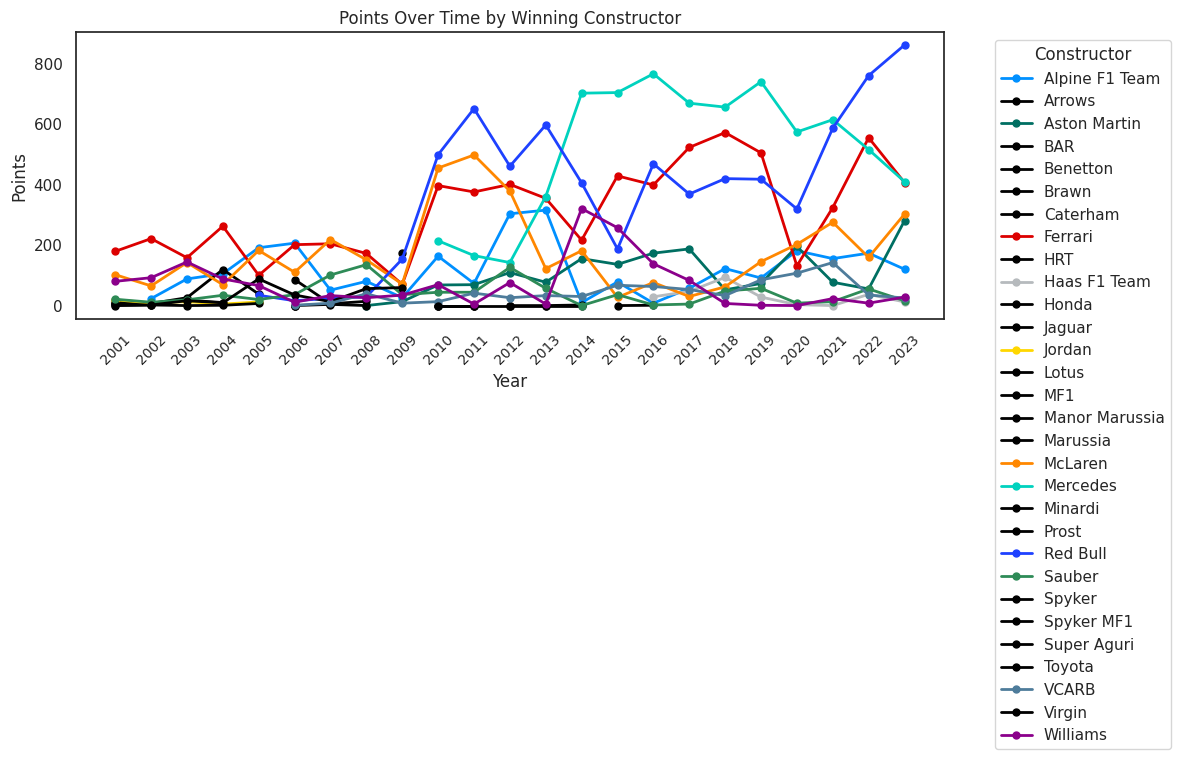

In [ ]:
linechart(df_constructor,team_colors)

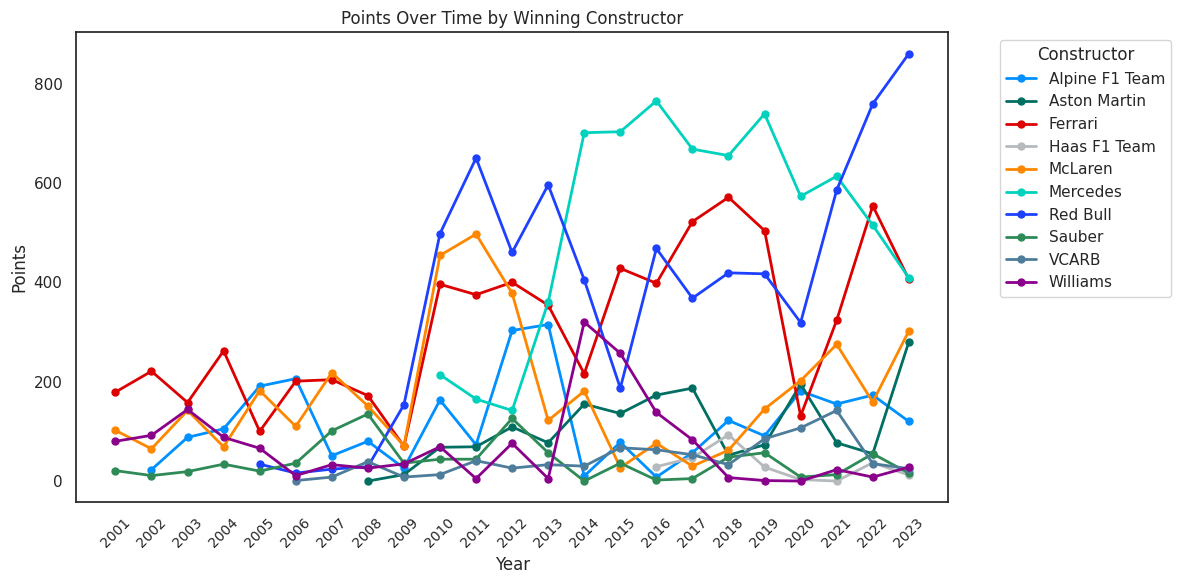

In [ ]:
linechart(present_constructor,team_colors)

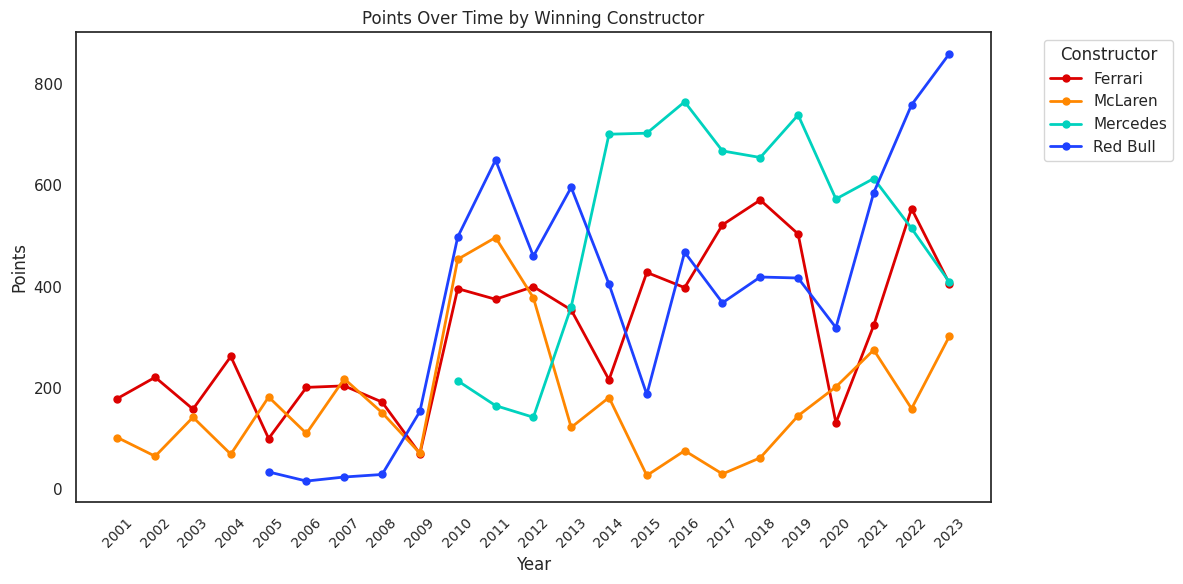

In [ ]:
linechart(winner_constructor,team_colors)

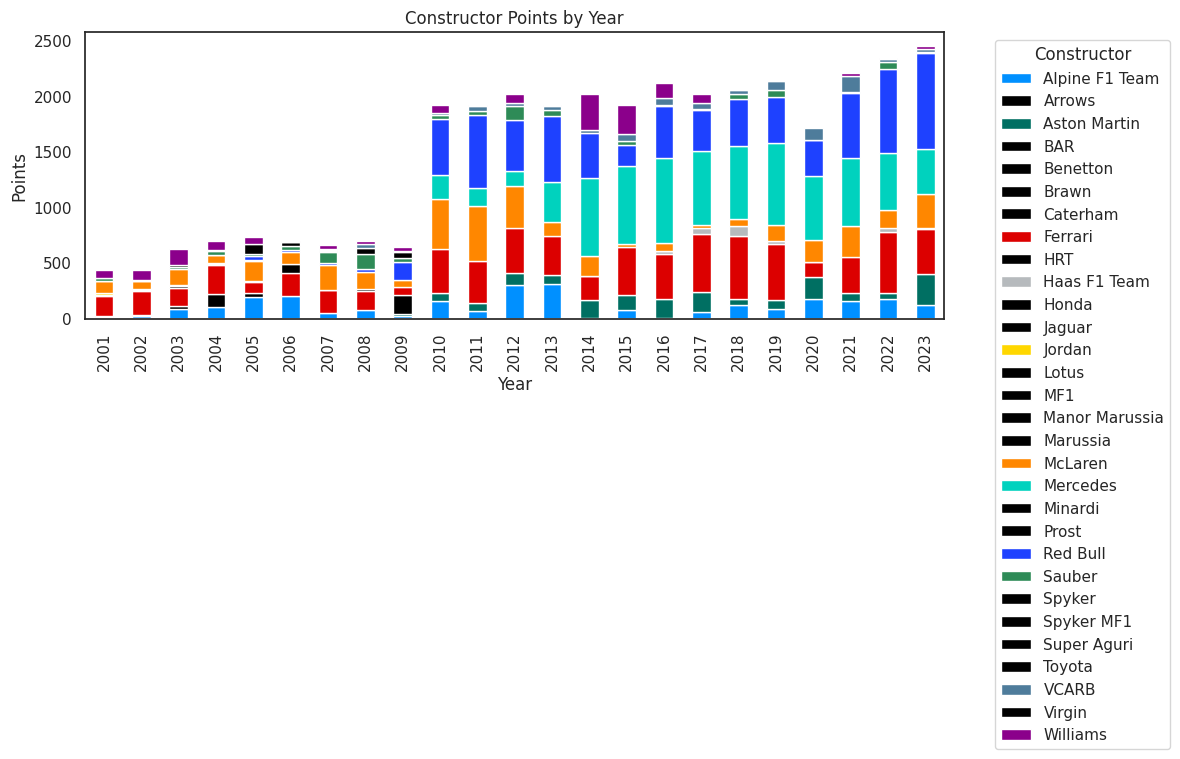

In [ ]:
stackline(df_constructor,team_colors)

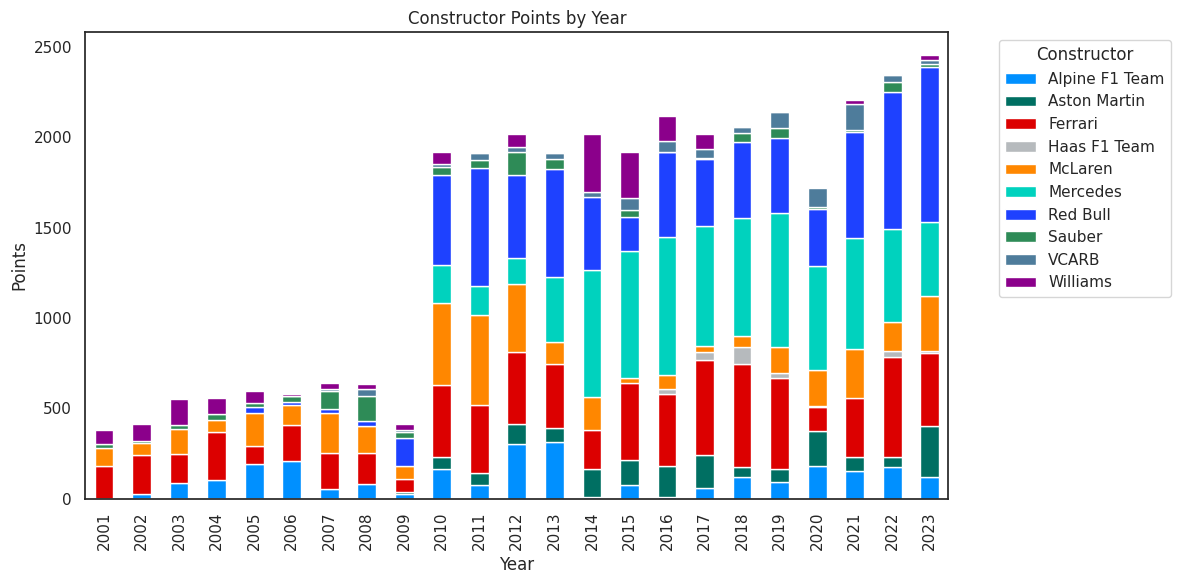

In [ ]:
stackline(present_constructor,team_colors)


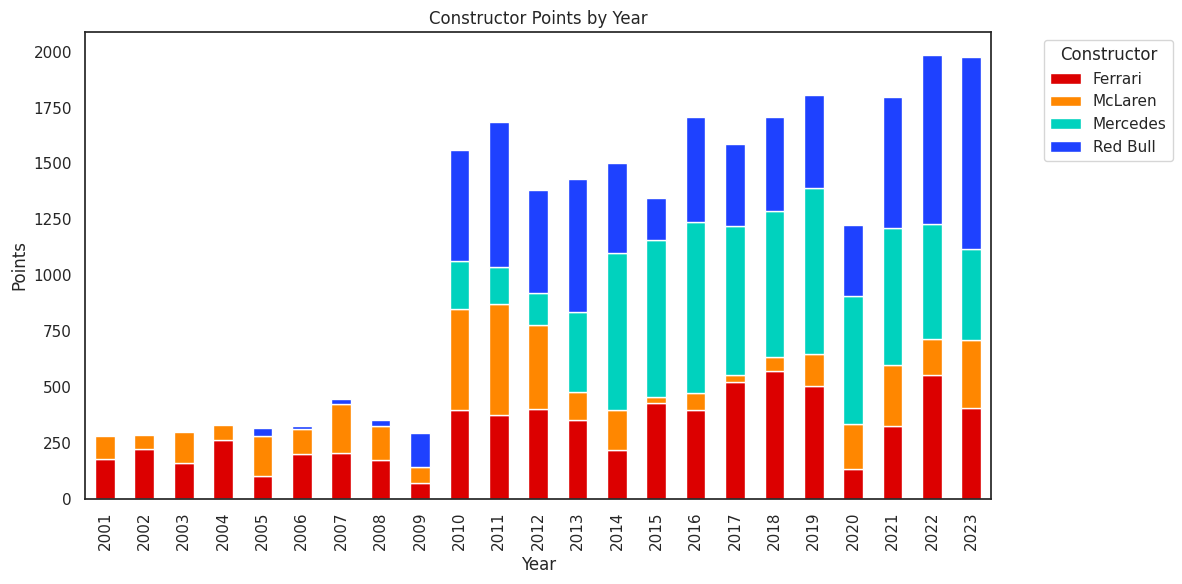

In [ ]:
stackline(winner_constructor,team_colors)

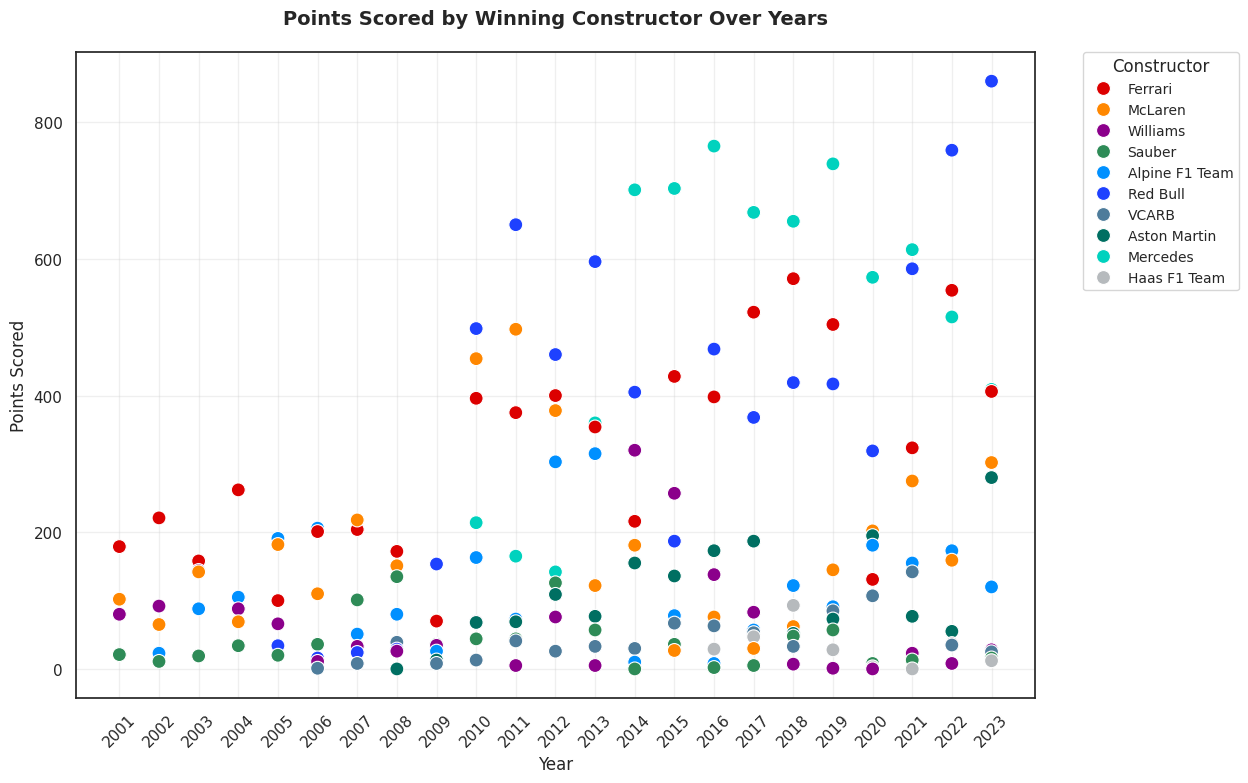

In [ ]:
scatter(present_constructor)


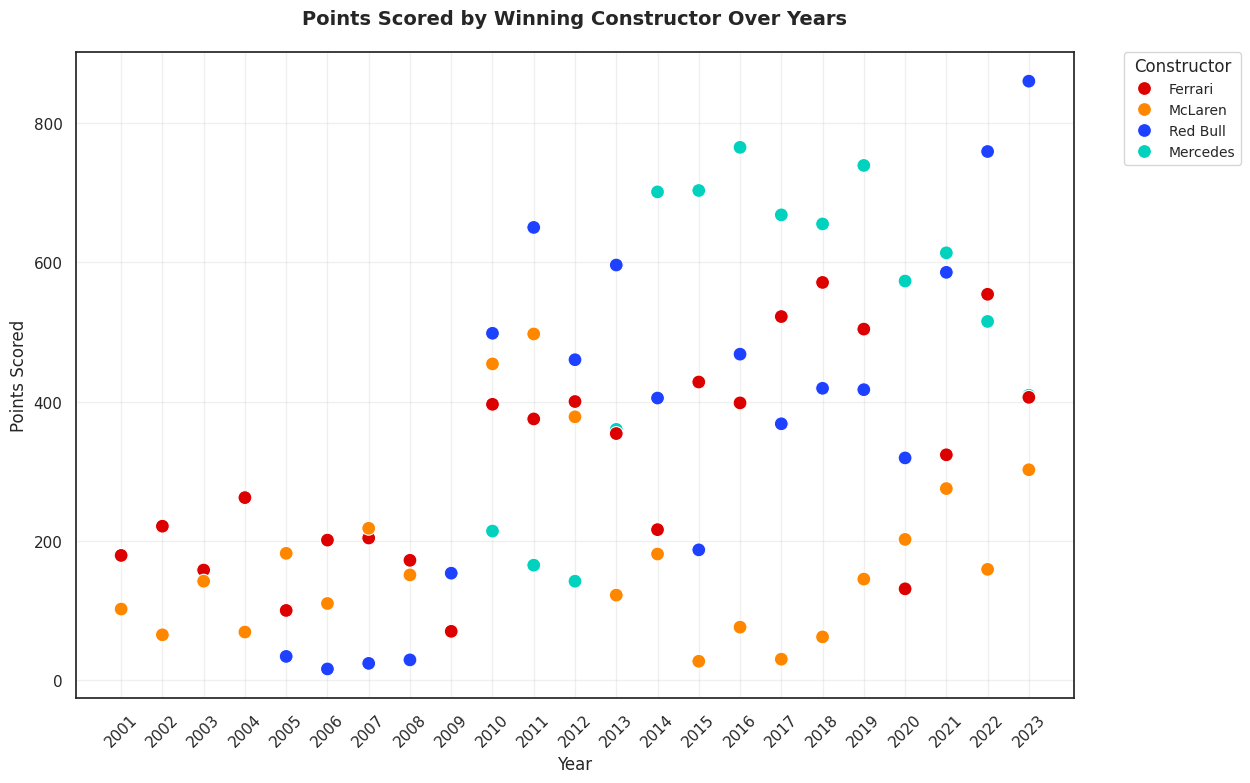

In [ ]:
scatter(winner_constructor)

# Qualifying

In [ ]:
df_quali.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


Year                        Track Country  Position              Driver  \
0  2001  Indianapolis Motor Speedway     USA         1  Michael Schumacher   
1  2001  Indianapolis Motor Speedway     USA         2     Ralf Schumacher   
2  2001  Indianapolis Motor Speedway     USA         3  Juan Pablo Montoya   
3  2001  Indianapolis Motor Speedway     USA         4       Mika Häkkinen   
4  2001  Indianapolis Motor Speedway     USA         5  Rubens Barrichello   

       Team        Q1   Q2   Q3  
0   Ferrari  1:11.708  NaN  NaN  
1  Williams  1:11.986  NaN  NaN  
2  Williams  1:12.252  NaN  NaN  
3   McLaren  1:12.309  NaN  NaN  
4   Ferrari  1:12.327  NaN  NaN

In [ ]:
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8531 entries, 0 to 8530
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      8531 non-null   int64 
 1   Track     8531 non-null   object
 2   Country   8531 non-null   object
 3   Position  8531 non-null   int64 
 4   Driver    8531 non-null   object
 5   Team      8531 non-null   object
 6   Q1        8411 non-null   object
 7   Q2        5490 non-null   object
 8   Q3        3395 non-null   object
dtypes: int64(2), object(7)
memory usage: 600.0+ KB


In [ ]:
df_quali = df_quali.dropna(subset=['Q1', 'Q2', 'Q3'])

# Convert times from string format to timedelta for sorting and plotting
def convert_time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    minutes, seconds = time_str.split(':')
    seconds, milliseconds = seconds.split('.')
    total_seconds = int(minutes) * 60 + int(seconds) + int(milliseconds) / 1000
    return total_seconds

df_quali['Q1'] = df_quali['Q1'].apply(convert_time_to_seconds)
df_quali['Q2'] = df_quali['Q2'].apply(convert_time_to_seconds)
df_quali['Q3'] = df_quali['Q3'].apply(convert_time_to_seconds)


<ipython-input-80-3e749c44aee2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quali['Q1'] = df_quali['Q1'].apply(convert_time_to_seconds)
<ipython-input-80-3e749c44aee2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quali['Q2'] = df_quali['Q2'].apply(convert_time_to_seconds)
<ipython-input-80-3e749c44aee2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
df_quali.head()

Year                          Track  Country  Position  \
1120  2006  Bahrain International Circuit  Bahrain         1   
1121  2006  Bahrain International Circuit  Bahrain         2   
1122  2006  Bahrain International Circuit  Bahrain         3   
1123  2006  Bahrain International Circuit  Bahrain         4   
1124  2006  Bahrain International Circuit  Bahrain         5   

                  Driver            Team      Q1      Q2      Q3  
1120  Michael Schumacher         Ferrari  93.310  92.025  91.431  
1121        Felipe Massa         Ferrari  93.579  92.014  91.478  
1122       Jenson Button           Honda  92.603  92.025  91.549  
1123     Fernando Alonso  Alpine F1 Team  92.433  91.215  91.702  
1124  Juan Pablo Montoya         McLaren  93.233  91.487  92.164

In [ ]:
active_drivers = [
    "Max Verstappen", "Sergio Perez", "Charles Leclerc", "Carlos Sainz",
    "Lando Norris", "Oscar Piastri", "Lewis Hamilton", "Fernando Alonso",
    "Esteban Ocon", "Pierre Gasly", "Valtteri Bottas", "Daniel Ricciardo", "Yuki Tsunoda", "Lance Stroll",
    "Zhou Guanyu"
]

unique_winning_drivers = [
    "Michael Schumacher",  # 2001 F1 World Champion
    "Kimi Räikkönen",      # 2003, 2005-2007 F1 Champion
    "Fernando Alonso",     # 2005-2006 F1 Champion
    "Lewis Hamilton",      # 2008, 2014-2015, 2017-2020 F1 Champion
    "Sebastian Vettel",    # 2010-2013 F1 Champion
    "Jenson Button",       # 2009 F1 Champion
    "Nico Rosberg",        # 2016 F1 Champion
    "Max Verstappen"       # 2021-2022 F1 Champion
]

active_quali = df_quali[df_quali['Driver'].isin(active_drivers)]
unique_quali = df_quali[df_quali['Driver'].isin(unique_winning_drivers)]

active_constructor_quali = df_quali[df_quali['Team'].isin(active_constructors)]
winner_constructor_quali = df_quali[df_quali['Team'].isin(unique_winners)]


In [ ]:
from matplotlib.ticker import MaxNLocator
def time_distribution(df_quali):
#  Session Time Distribution
    data = [df_quali['Q1'], df_quali['Q2'], df_quali['Q3']]
    plt.boxplot(data, labels=['Q1', 'Q2', 'Q3'])
    plt.title('Time Distribution Across Quali Sessions', fontsize=12)
    plt.ylabel('Time (seconds)')

def team_peformance(df_quali):
# Team Performance in Q3
    team_q3_mean = df_quali.groupby('Team')['Q3'].mean().sort_values()
    team_q3_mean.plot(kind='barh')
    plt.title('Average Q3 Time by Team', fontsize=12)
    plt.xlabel('Time (seconds)')

def session_improvement(df_quali):
# Session Improvement
    df_quali['Q1-Q2 Improvement'] = df_quali['Q1'] - df_quali['Q2']
    df_quali['Q2-Q3 Improvement'] = df_quali['Q2'] - df_quali['Q3']
    improvements = df_quali[['Q1-Q2 Improvement', 'Q2-Q3 Improvement']].mean()
    improvements.plot(kind='bar')
    plt.title('Average Session Time Improvement', fontsize=12)
    plt.ylabel('Time Improvement (seconds)')

def team_consistency(df_quali):
# Team Qualifying Consistency
    team_std = df_quali.groupby('Team')['Q3'].std().sort_values()
    team_std.plot(kind='barh')
    plt.title('Team Consistency in Q3 (Standard Deviation)', fontsize=12)
    plt.xlabel('Time Variation (seconds)')

    plt.tight_layout()



# Function for year-over-year analysis
def plot_yearly_trends(df_quali, team_color=team_colors):
    fig, ax1= plt.subplots(figsize=(20, 10))
    # Yearly Pole Position Times
    yearly_poles = df_quali[df_quali['Position'] == 1].groupby('Year')['Q3'].mean()
    yearly_poles.plot(marker='o', ax=ax1)
    ax1.set_title('Pole Position Times Over Years', fontsize=12)
    ax1.set_ylabel('Time (seconds)')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.grid(True, linestyle='-', alpha=0.3)


def top_team(df_quali, team_color=team_colors):
    # Top Team Performance Evolution
    fig, ax2 = plt.subplots(figsize=(20, 10))

    top_teams = df_quali.groupby('Team')['Q3'].count().nlargest(5).index
    for team in top_teams:
        team_data = df_quali[df_quali['Team'] == team].groupby('Year')['Q3'].mean()
        team_color_value = team_color.get(team, '#333333')
        ax2.plot(team_data.index, team_data.values, marker='o', label=team, color=team_color_value)
    ax2.set_title('Top Teams Performance Evolution', fontsize=12)
    ax2.set_ylabel('Average Q3 Time (seconds)')
    ax2.legend()
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.grid(True, linestyle='-', alpha=0.3)

    plt.tight_layout()

def scatter_plots(df_quali, team_colors):
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))

    # Function to add correlation line and annotation
    def add_correlation(x, y, ax):
        correlation = np.corrcoef(x, y)[0, 1]
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(x, p(x), "k--", alpha=0.8, linewidth=1)
        ax.text(0.05, 0.95, f'r = {correlation:.3f}',
                transform=ax.transAxes,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    # Plotting configurations
    scatter_configs = [
        ('Q1', 'Q2', axes[0], 'Q1 vs Q2 Times'),
        ('Q1', 'Q3', axes[1], 'Q1 vs Q3 Times'),
        ('Q2', 'Q3', axes[2], 'Q2 vs Q3 Times')
    ]

    team_legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w',
                    markerfacecolor=color, label=team, markersize=10)
        for team, color in team_colors.items() if team in df_quali['Team'].unique()
    ]

    # Plot each scatter plot with correlation lines
    for x_col, y_col, ax, title in scatter_configs:
        # Plot points for each team
        for team in df_quali['Team'].unique():
            team_data = df_quali[df_quali['Team'] == team]
            ax.scatter(team_data[x_col], team_data[y_col],
                       color=team_colors.get(team, '#333333'),
                       alpha=0.7,
                       s=100)

        # Add correlation line and coefficient
        add_correlation(df_quali[x_col], df_quali[y_col], ax)

        # Add diagonal reference line
        min_val = min(df_quali[x_col].min(), df_quali[y_col].min())
        max_val = max(df_quali[x_col].max(), df_quali[y_col].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'k:', alpha=0.5)

        # Customize plot
        ax.set_title(title, pad=20, fontsize=12, fontweight='bold')
        ax.set_xlabel(f'{x_col} Time (seconds)', fontsize=10)
        ax.set_ylabel(f'{y_col} Time (seconds)', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)

        # Format axis ticks
        ax.tick_params(axis='both', which='major', labelsize=9)

        # Make plot square
        ax.set_aspect('equal')

    # Add legend for teams
    fig.legend(handles=team_legend_elements,
               title='Teams',
               bbox_to_anchor=(1.02, 0.5),
               loc='center left',
               borderaxespad=0,
               fontsize=10)

    # Add overall title
    plt.suptitle('Qualifying Session Time Comparisons',
                 fontsize=14,
                 fontweight='bold',
                 y=1.05)

    # Adjust layout to accommodate legend
    plt.tight_layout()
    plt.subplots_adjust(right=0.85)

    # Show the plot
    plt.show()

    return fig


<ipython-input-83-c54640dbc895>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Q1', 'Q2', 'Q3'])


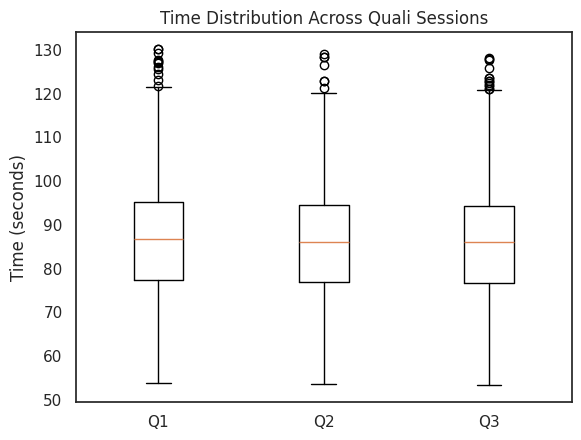

In [ ]:
# Session Time Distribution for active drivers
time_distribution(active_quali)

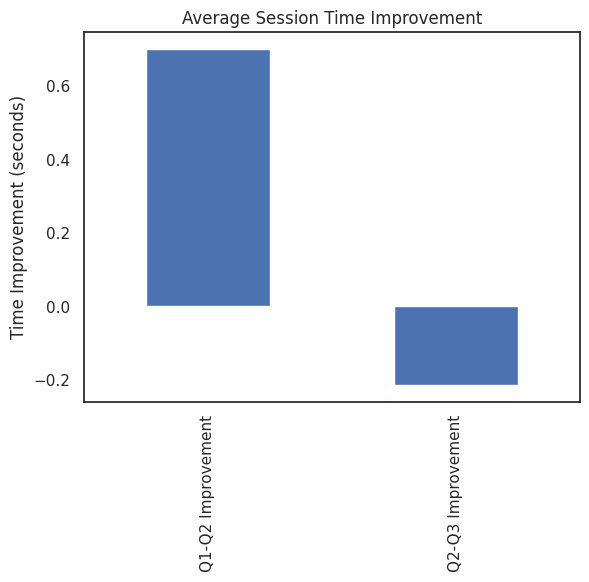

In [ ]:
# Session Improvement for unique winning drivers
session_improvement(df_quali)

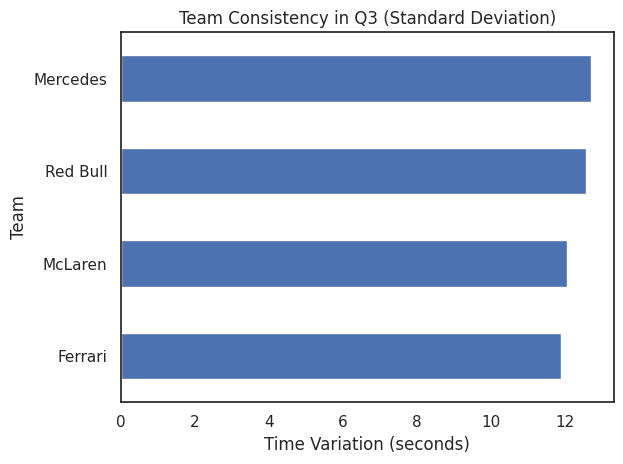

In [ ]:

# Team Qualifying Consistency for winner constructors
team_consistency(winner_constructor_quali)

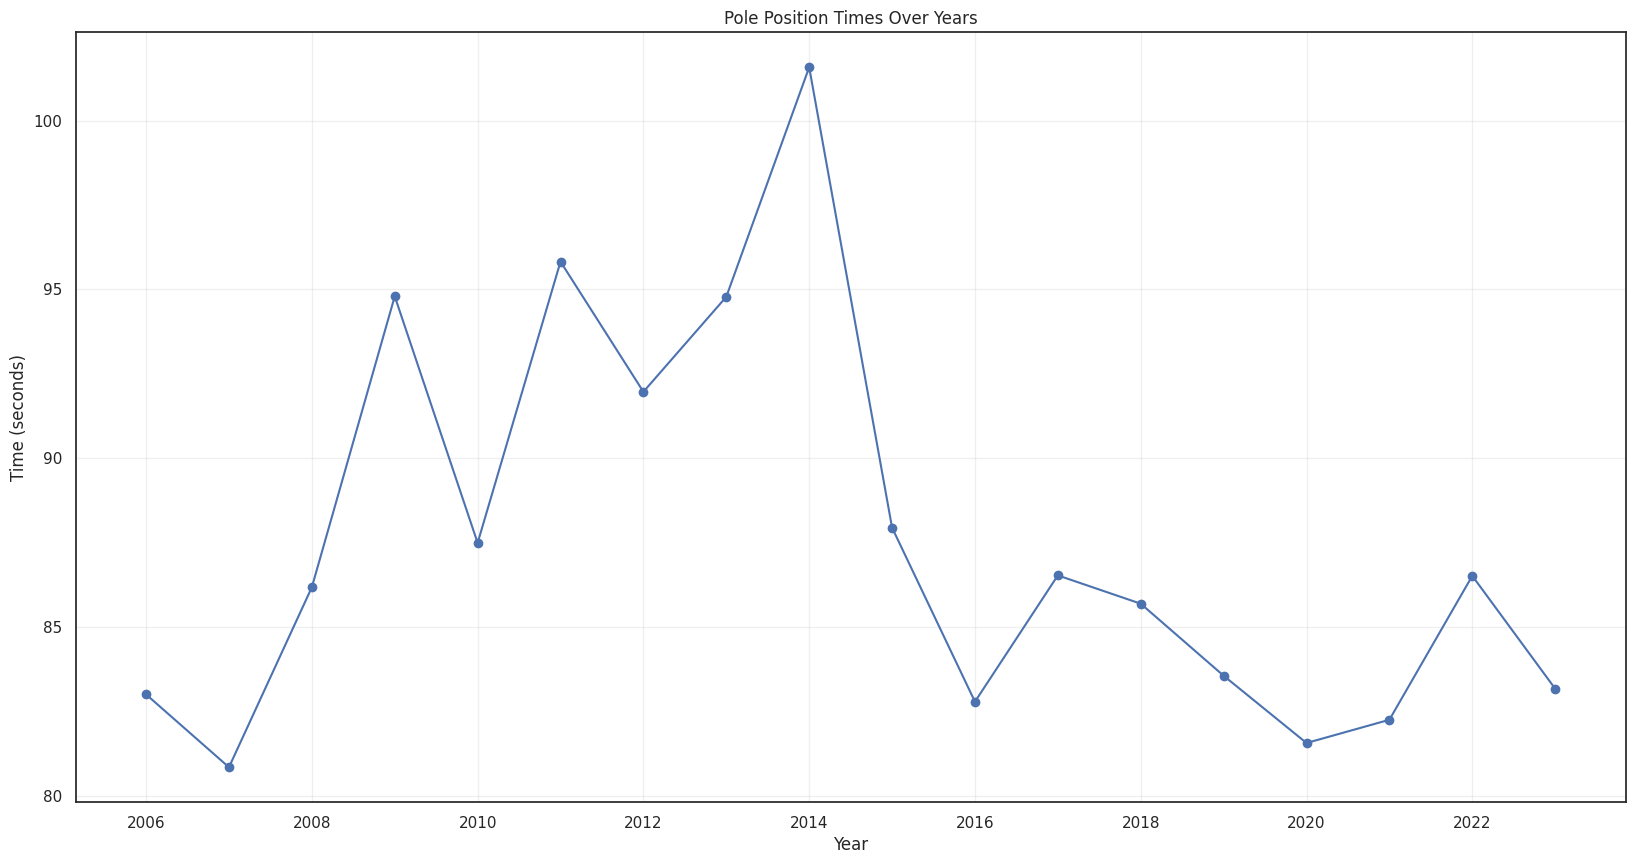

In [ ]:

# Yearly Trends for active drivers (optional, can be passed filtered data)
plot_yearly_trends(active_quali)


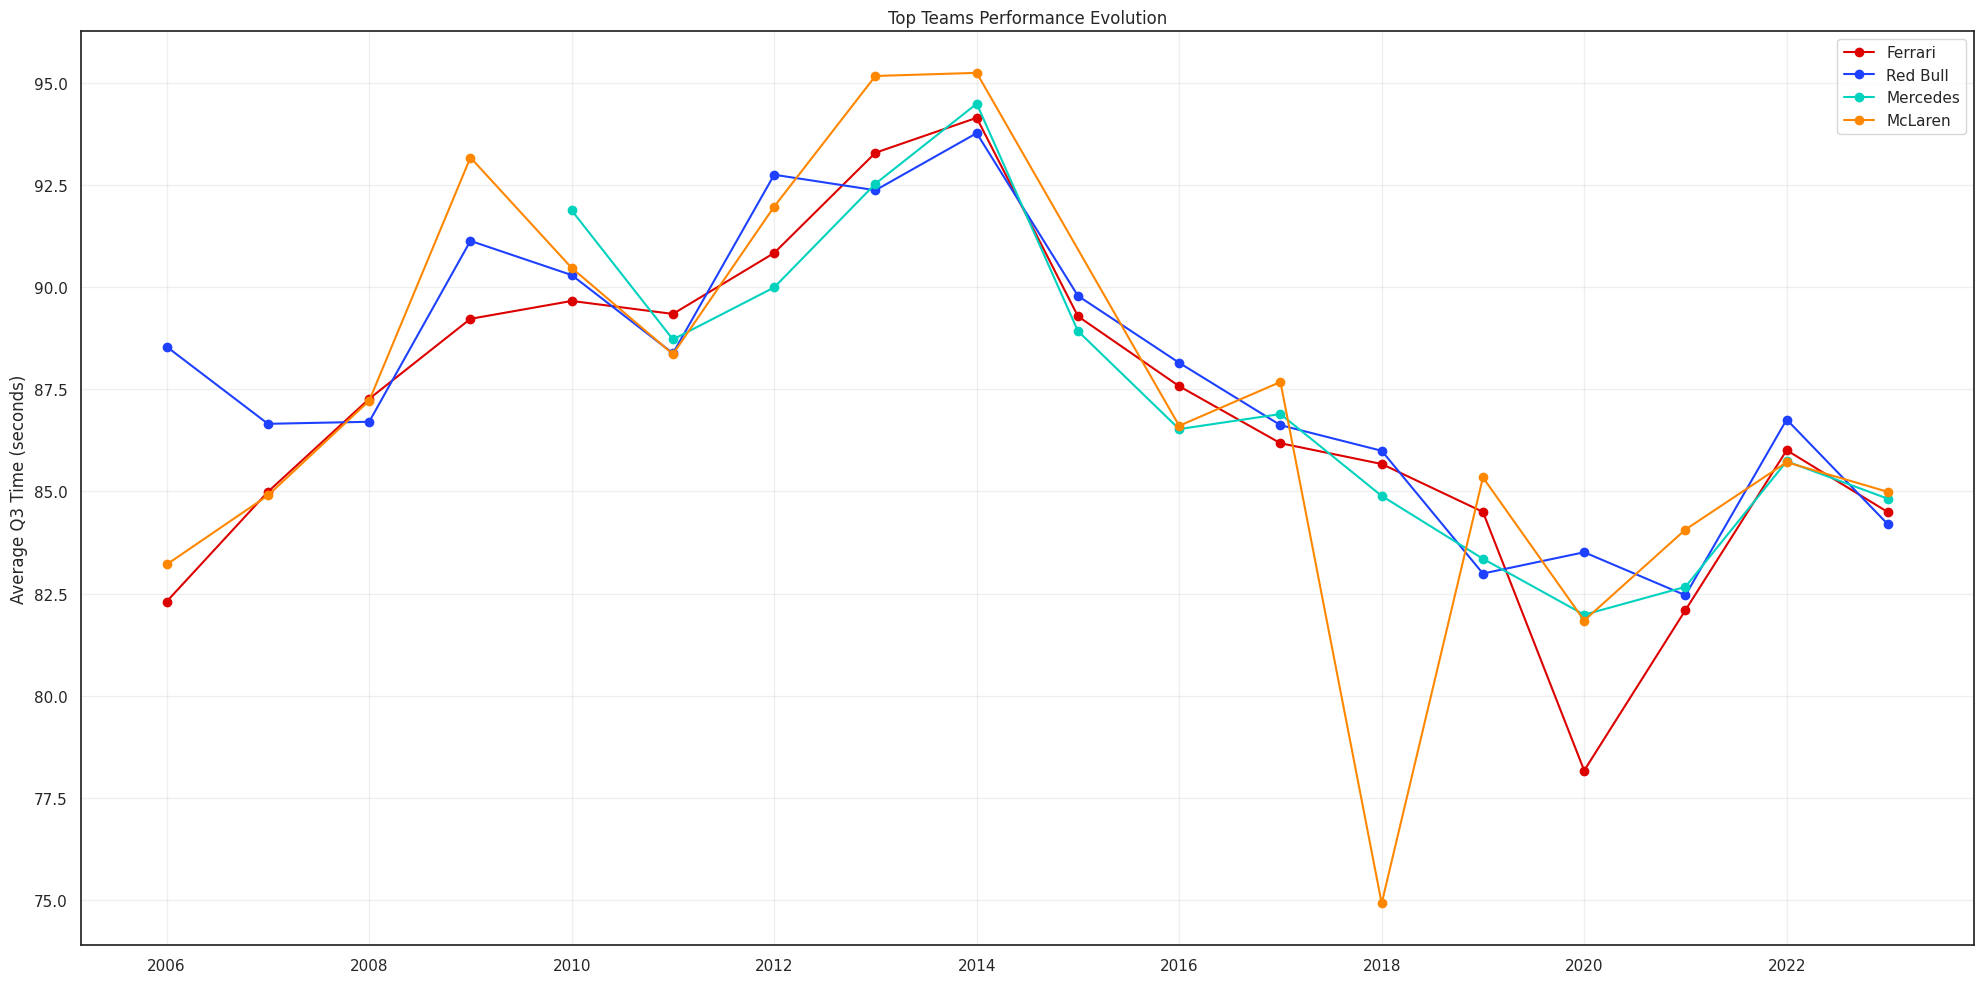

In [ ]:
# Top Team Performance Evolution for winner constructors
top_team(winner_constructor_quali)

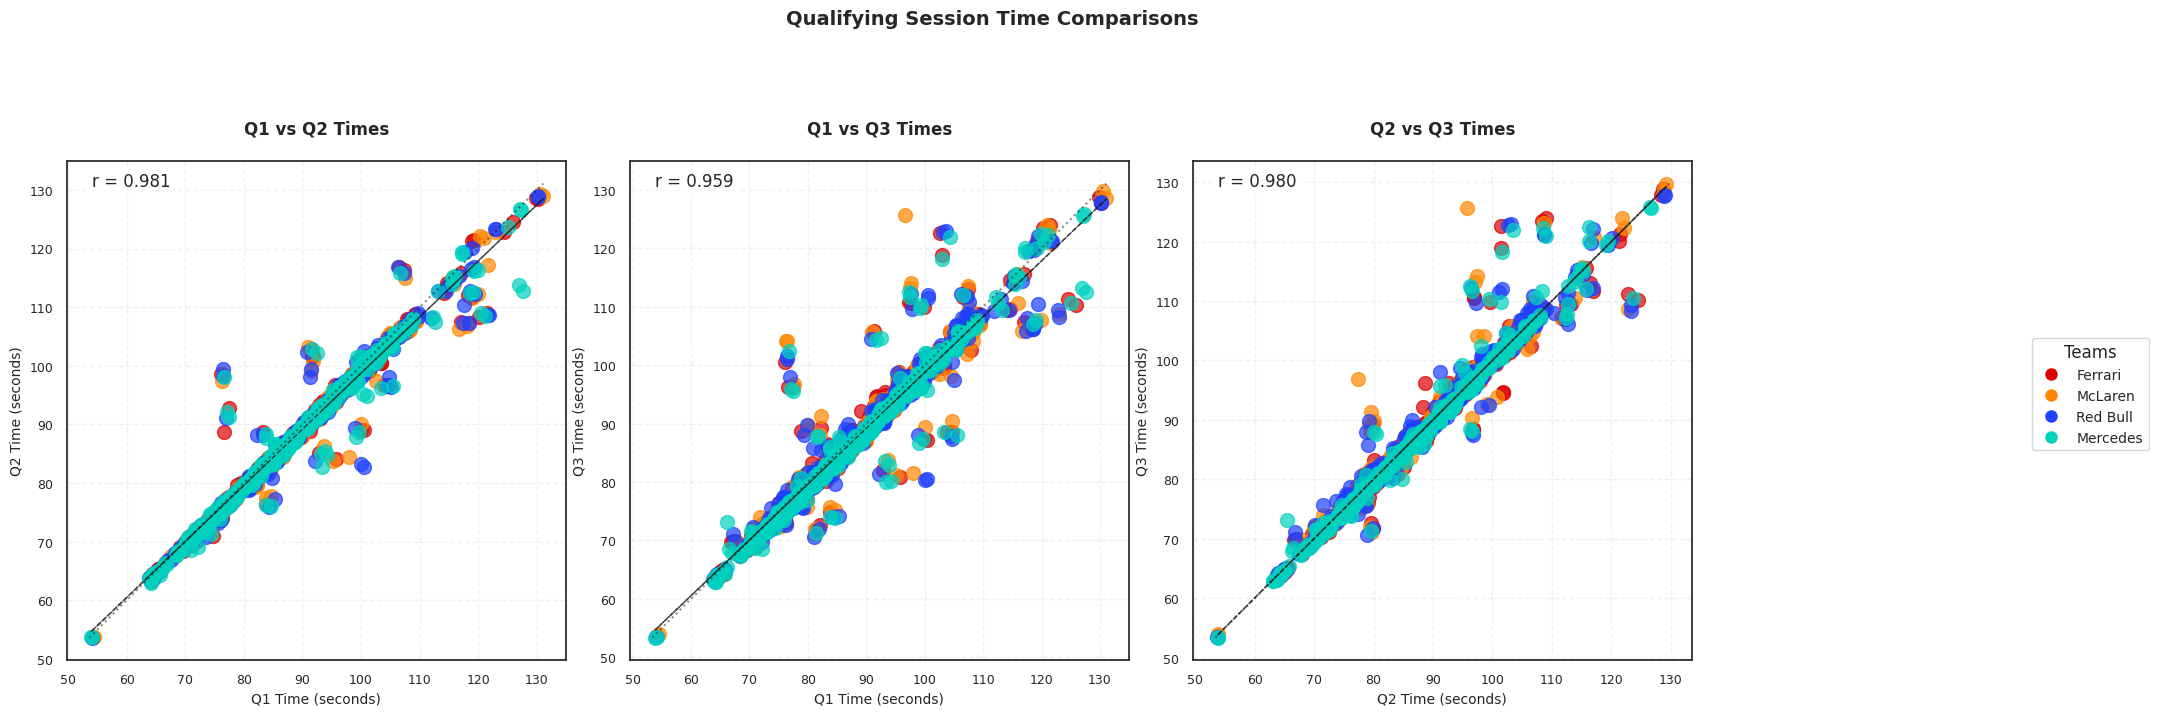

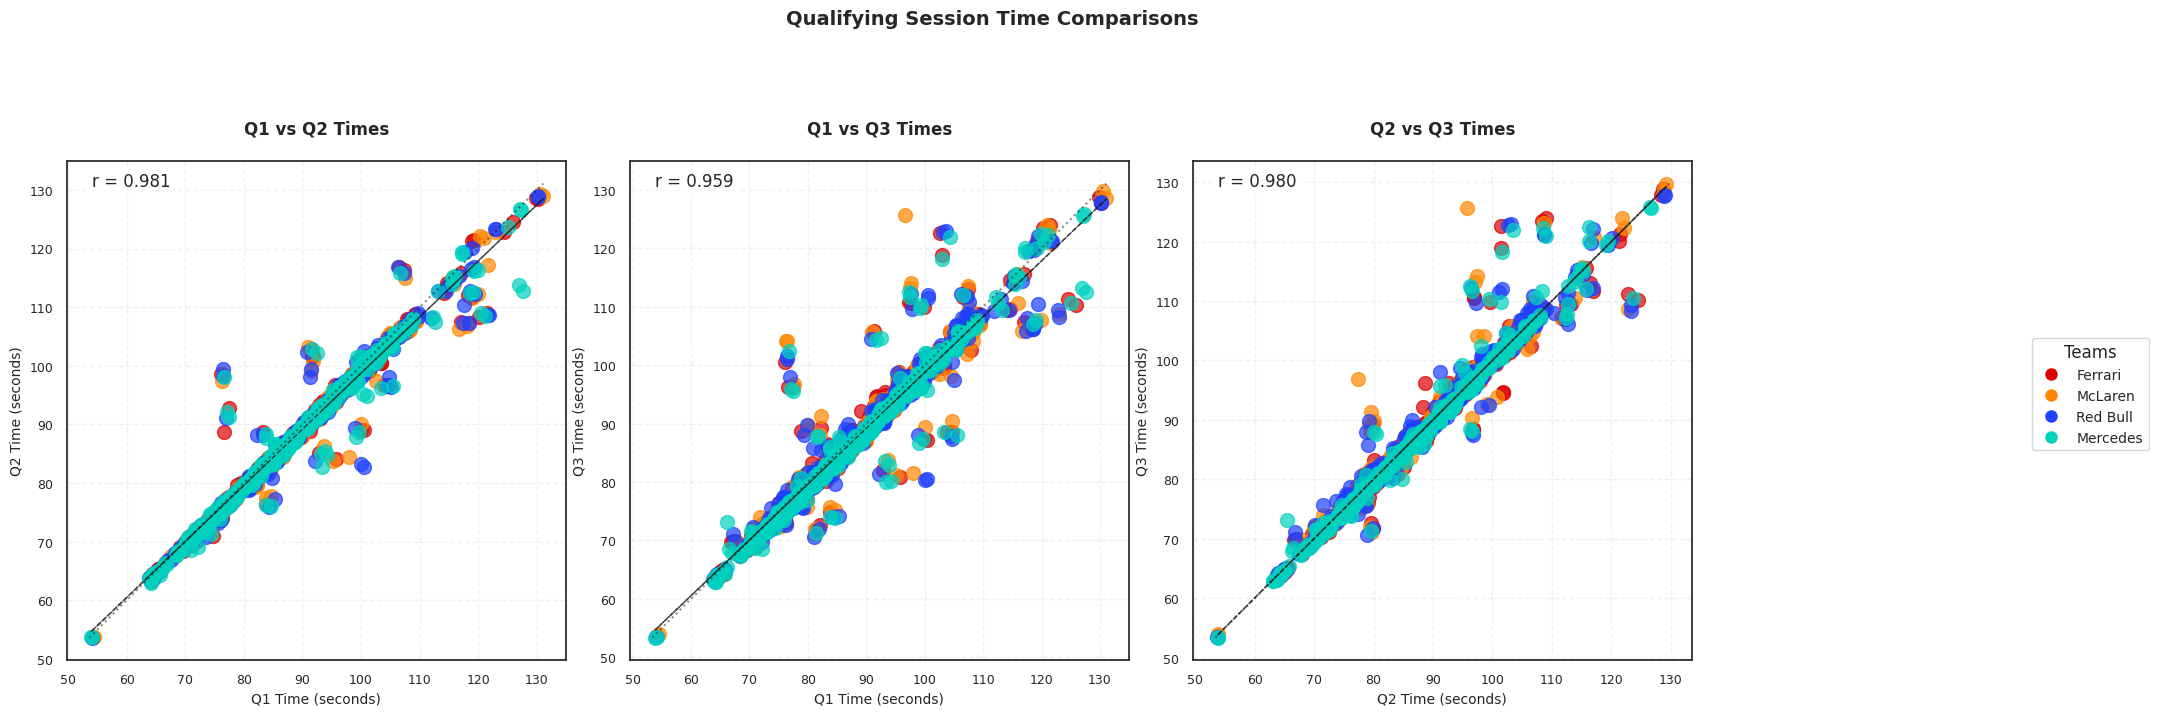

In [ ]:
scatter_plots(winner_constructor_quali, team_colors)

# Race Results

In [ ]:
df_race_result.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


Year                           Track    Country  Position  \
0  2001  Albert Park Grand Prix Circuit  Australia         1   
1  2001  Albert Park Grand Prix Circuit  Australia         2   
2  2001  Albert Park Grand Prix Circuit  Australia         3   
3  2001  Albert Park Grand Prix Circuit  Australia         4   
4  2001  Albert Park Grand Prix Circuit  Australia         5   

                  Driver     Team  Starting Grid  Laps Time/Retired  Points  \
0     Michael Schumacher  Ferrari              1    58      38:26.5    10.0   
1        David Coulthard  McLaren              6    58        1.717     6.0   
2     Rubens Barrichello  Ferrari              2    58       33.491     4.0   
3          Nick Heidfeld   Sauber             10    58    +1:11.479     3.0   
4  Heinz-Harald Frentzen   Jordan              4    58    +1:12.807     2.0   

   +1pts Fastest Lap Time  
0      0              NaN  
1      0              NaN  
2      0              NaN  
3      0              NaN  
4      0              NaN

In [ ]:
active_constructor_rr = df_race_result[df_race_result['Team'].isin(active_constructors)]
winner_constructor_rr = df_race_result[df_race_result['Team'].isin(unique_winners)]

active_driver_rr = df_race_result[df_race_result['Driver'].isin(active_drivers)]
winner_driver_rr = df_race_result[df_race_result['Driver'].isin(unique_winning_drivers)]

In [ ]:
def top_10_drivers_by_points(df_race_result):
    top_drivers = df_race_result.groupby('Driver')['Points'].sum().nlargest(10)

    plt.figure(figsize=(10, 6))
    top_drivers.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Drivers by Total Points ', fontsize=14)
    plt.xlabel('Driver', fontsize=12)
    plt.ylabel('Total Points', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_team_performance(df_race_result):
    team_performance = df_race_result.groupby('Team')['Points'].sum()

    plt.figure(figsize=(12, 6))
    team_performance.plot(kind='bar', color='skyblue')
    plt.title('Total Points by Team in 2001', fontsize=14)
    plt.xlabel('Team', fontsize=12)
    plt.ylabel('Total Points', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_team_performance(df_race_result):
    plt.figure(figsize=(10, 6))
    team_points = df_race_result.groupby('Team')['Points'].sum().sort_values(ascending=True)
    team_points.plot(kind='barh', color='skyblue')
    plt.title('Points by Team', fontsize=14, pad=20)
    plt.xlabel('Total Points', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_driver_positions_by_track(df_race_result):
    plt.figure(figsize=(20, 12))
    track_positions = pd.pivot_table(df_race_result,
                                     values='Position',
                                     index='Track',
                                     columns='Driver',
                                     aggfunc='mean')
    sns.heatmap(track_positions, cmap='YlOrRd_r', annot=True, fmt='.1f')
    plt.title('Driver Positions by Track (Active)', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



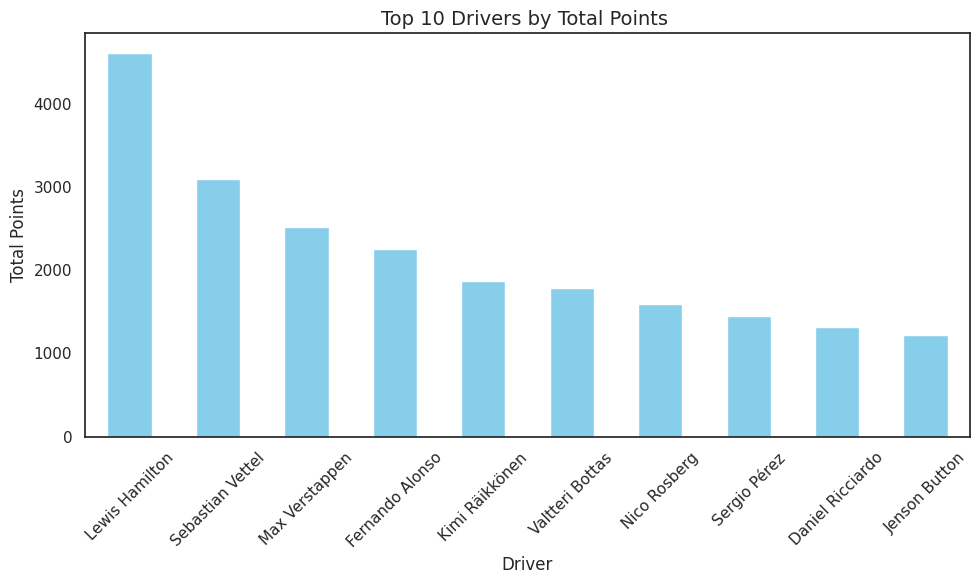

In [ ]:
top_10_drivers_by_points(df_race_result)

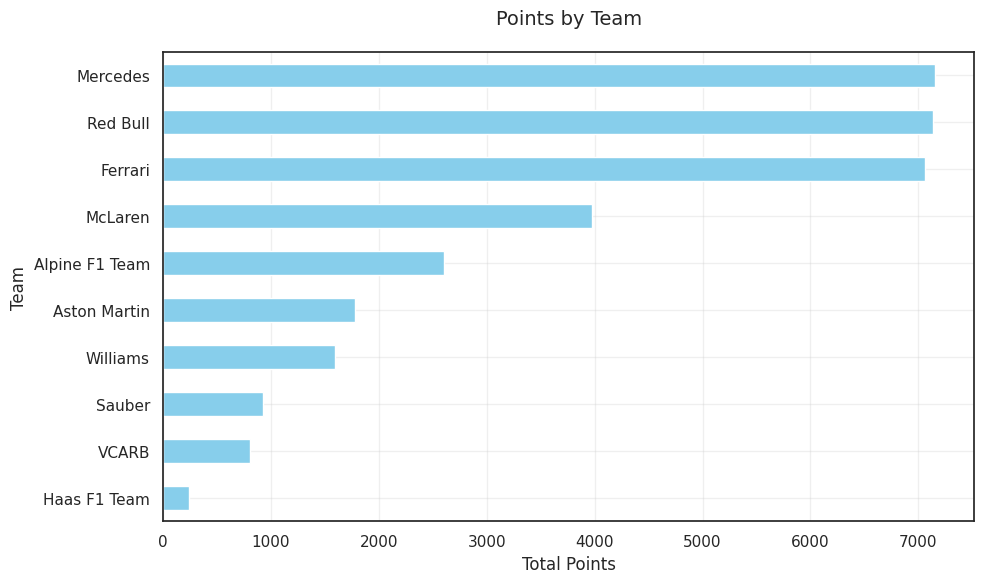

In [ ]:
plot_team_performance(active_constructor_rr)

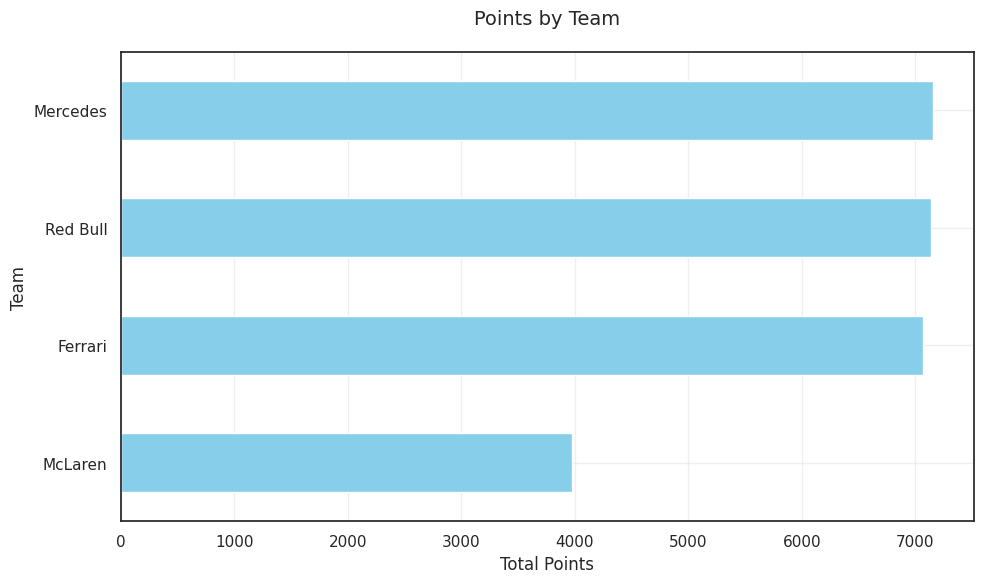

In [ ]:
plot_team_performance(winner_constructor_rr)

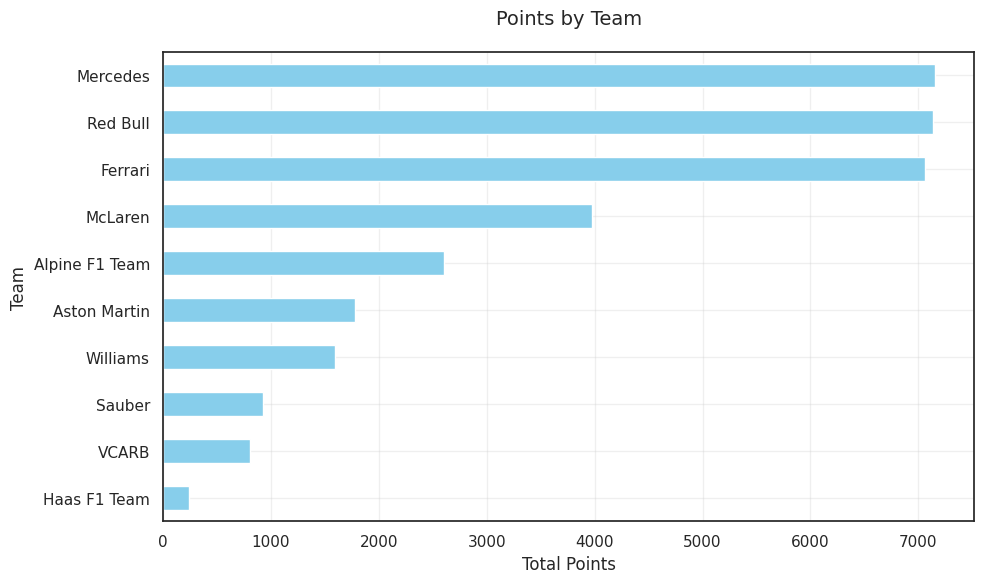

In [ ]:
plot_team_performance(active_constructor_rr)

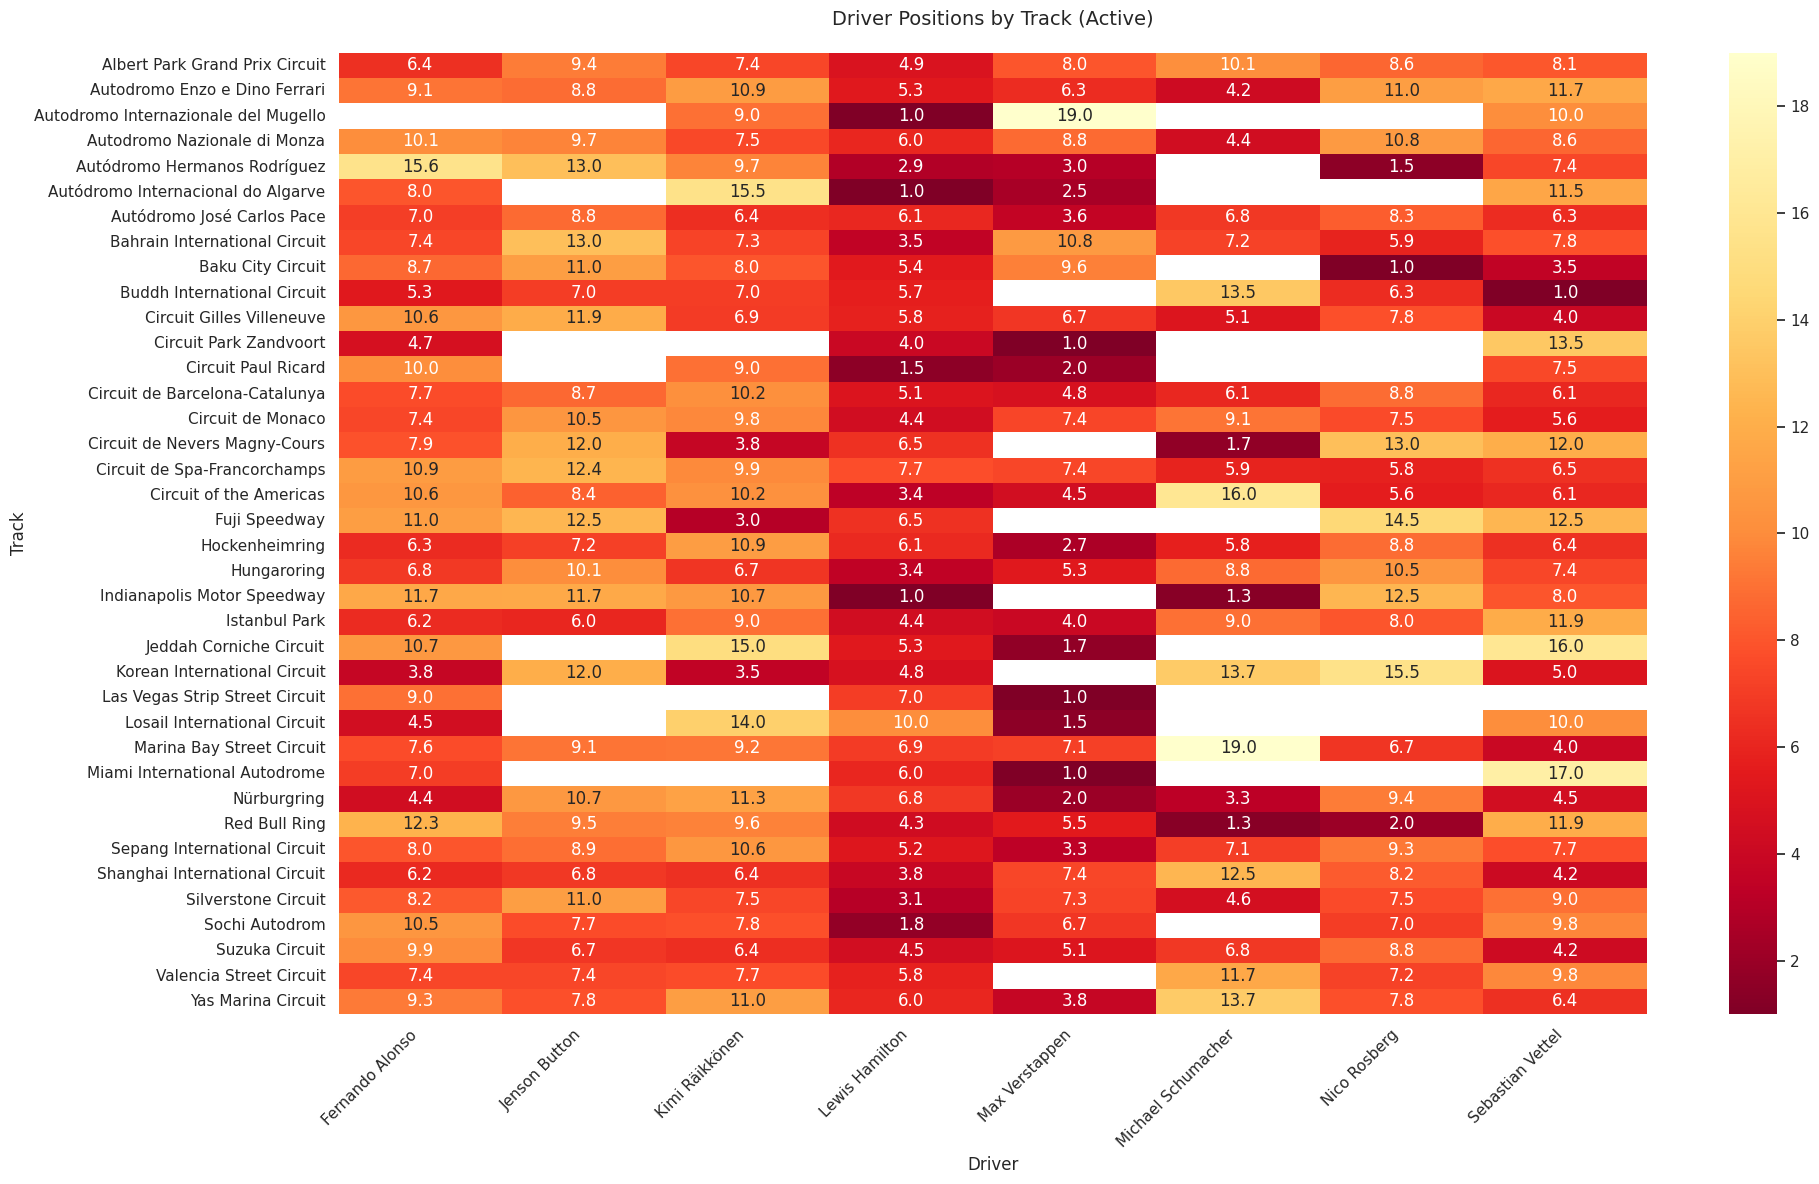

In [ ]:
plot_driver_positions_by_track(winner_driver_rr)

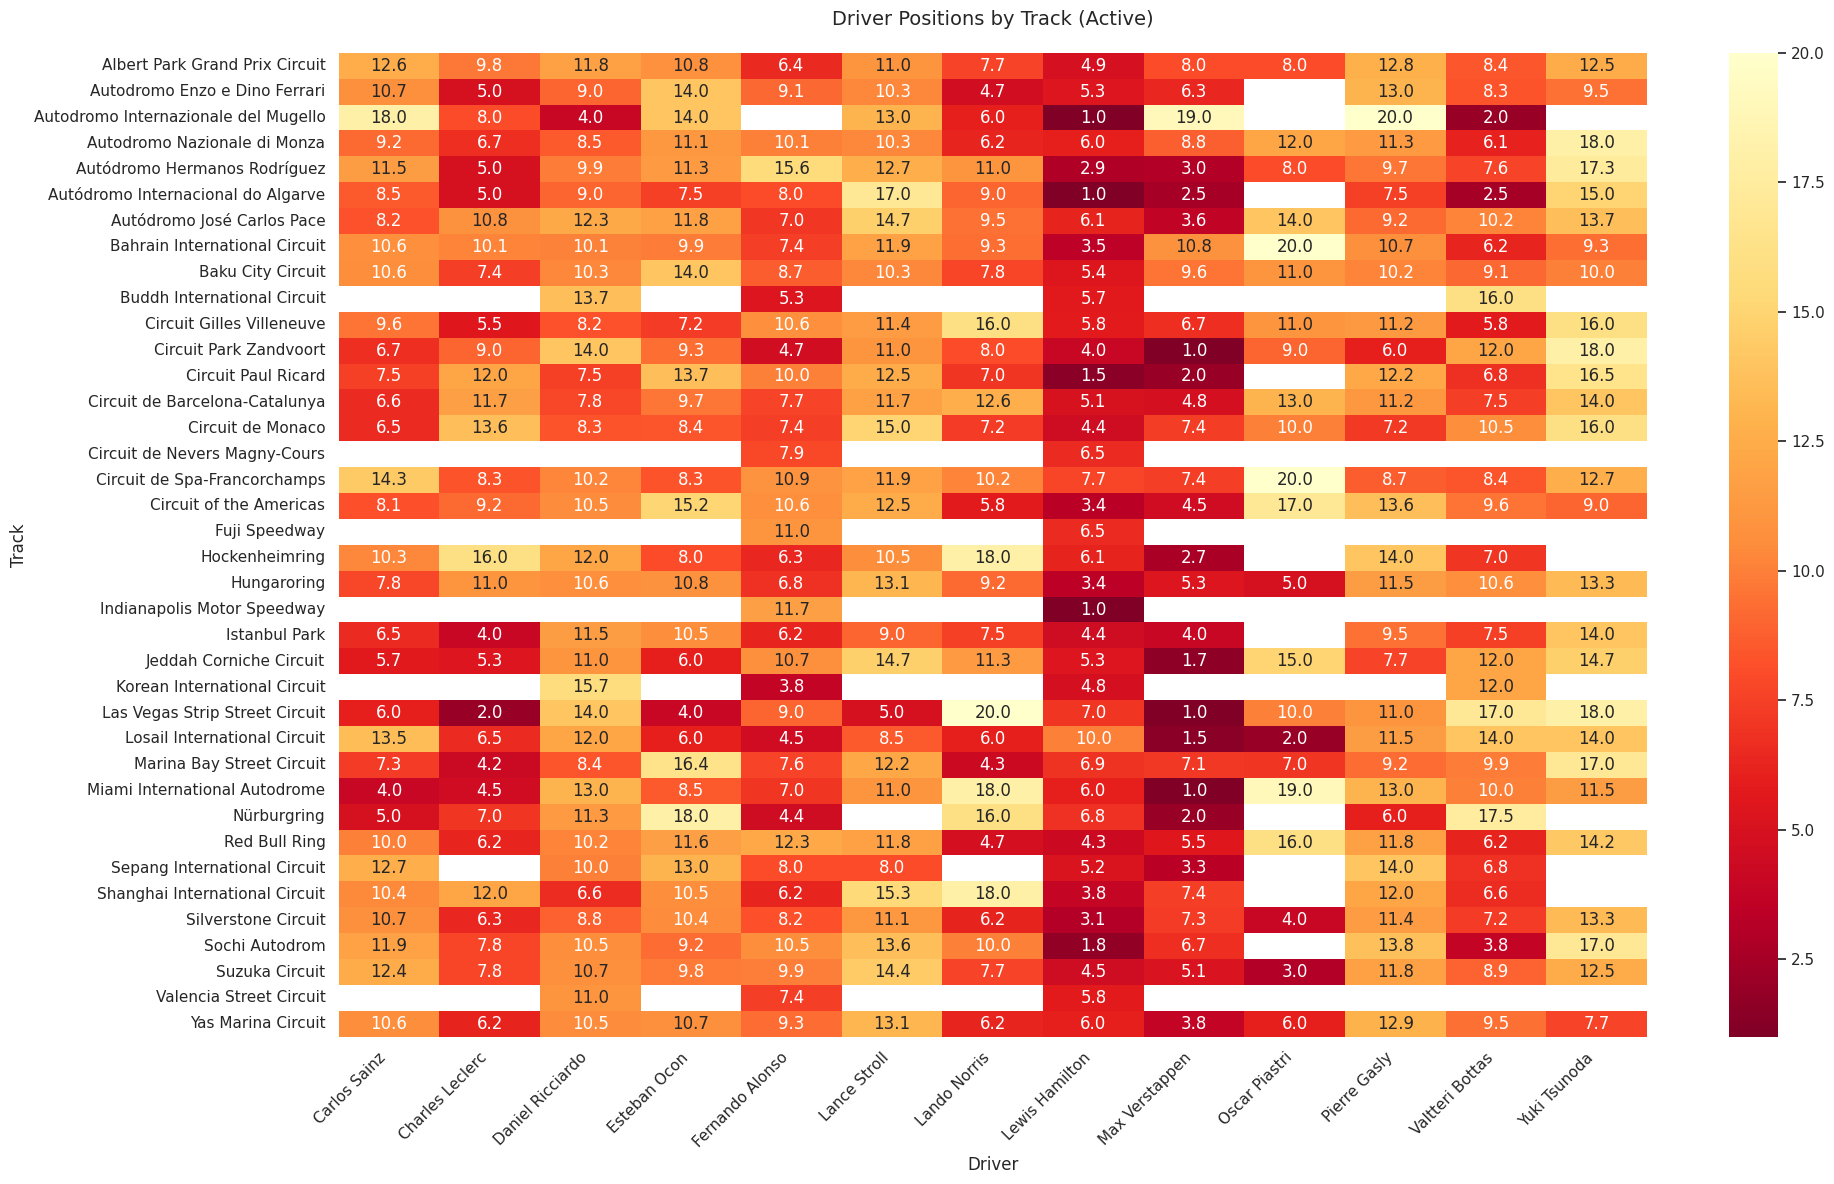

In [ ]:
plot_driver_positions_by_track(active_driver_rr)

# Pit Stop


In [ ]:
df_pitstop.head()

Year                         Circuit    Country         Driver Name  \
0  2011  Albert Park Grand Prix Circuit  Australia   Jaime Alguersuari   
1  2011  Albert Park Grand Prix Circuit  Australia  Michael Schumacher   
2  2011  Albert Park Grand Prix Circuit  Australia         Mark Webber   
3  2011  Albert Park Grand Prix Circuit  Australia     Fernando Alonso   
4  2011  Albert Park Grand Prix Circuit  Australia        Felipe Massa   

   Stop Number  Duration (s)  
0            1        26.898  
1            1        25.021  
2            1        23.426  
3            1        23.251  
4            1        23.842

In [ ]:
df_winner_pitstop = df_pitstop[df_pitstop['Driver Name'].isin(unique_winning_drivers)]
df_active_pitstop = df_pitstop[df_pitstop['Driver Name'].isin(active_drivers)]

In [ ]:
def pit_stop_duration_vs_lap(df_race_data):
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_race_data, x='Lap', y='Duration (s)', hue='Driver Name', marker='o')
    plt.title('Pit Stop Duration vs Lap for Each Driver', fontsize=14)
    plt.xlabel('Lap Number', fontsize=12)
    plt.ylabel('Pit Stop Duration (seconds)', fontsize=12)
    plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# 3. Pit Stop Duration Distribution Across Races
def pit_stop_duration_by_race(df_race_data):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_race_data, x='Race Name', y='Duration (s)', palette='Set2')
    plt.title('Pit Stop Duration Distribution Across Races', fontsize=14)
    plt.xlabel('Race Name', fontsize=12)
    plt.ylabel('Pit Stop Duration (seconds)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 4. Average Pit Stop Duration for Each Driver
def avg_pit_stop_duration(df_race_data):
    avg_duration = df_race_data.groupby('Driver Name')['Duration (s)'].mean().sort_values()
    plt.figure(figsize=(12, 6))
    avg_duration.plot(kind='barh', color='lightgreen', edgecolor='darkgreen', width=0.8)
    plt.title('Average Pit Stop Duration per Driver', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel('Average Duration (seconds)', fontsize=14, color='darkred')
    plt.ylabel('Driver', fontsize=14, color='darkred')
    plt.xticks(fontsize=12, color='black')
    plt.yticks(fontsize=12, color='black')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# 5. Pit Stop Duration Over Time (Yearly or Race Evolution)
def pit_stop_duration_over_time(df_race_data):
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_race_data, x='Year', y='Duration (s)', hue='Driver Name', marker='o', linestyle='-', markersize=8)
    plt.title('Pit Stop Duration Over Time by Driver', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Pit Stop Duration (seconds)', fontsize=12)
    plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# 7. Total Pit Stop Duration by Race
def total_pit_stop_duration_by_race(df_race_data):
    total_duration = df_race_data.groupby('Race Name')['Duration (s)'].sum().sort_values(ascending=False)
    plt.figure(figsize=(14, 8))
    total_duration.plot(kind='bar', color='orange')
    plt.title('Total Pit Stop Duration by Race', fontsize=14)
    plt.xlabel('Race Name', fontsize=12)
    plt.ylabel('Total Duration (seconds)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


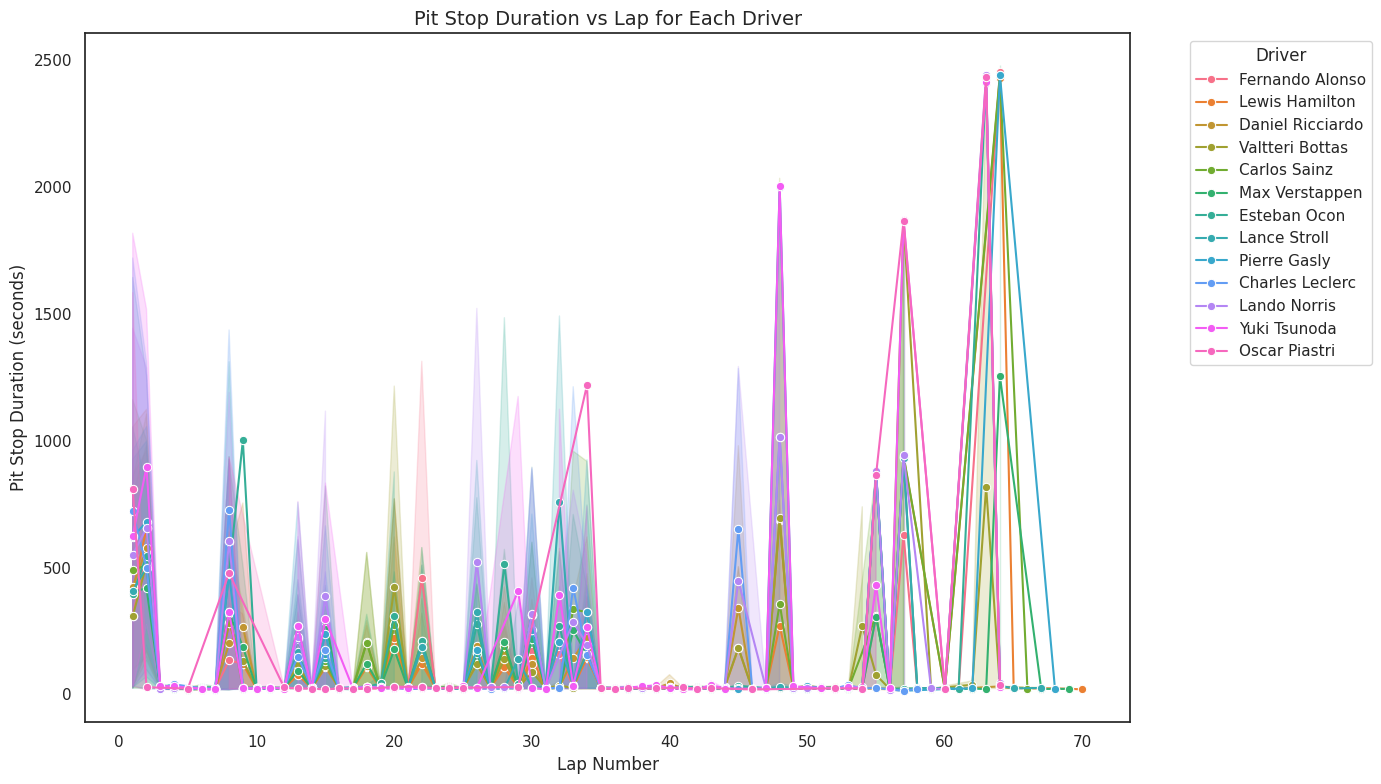

In [ ]:
#pit_stop_duration_vs_lap(df_winner_pitstop)
#pit_stops_per_driver(df_winner_pitstop)
#pit_stop_duration_by_race(df_winner_pitstop)
#avg_pit_stop_duration(df_winner_pitstop)
#pit_stop_duration_over_time(df_winner_pitstop)
pit_stop_duration_vs_lap(df_active_pitstop)

<ipython-input-101-09110e54e4ea>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_race_data, x='Race Name', y='Duration (s)', palette='Set2')


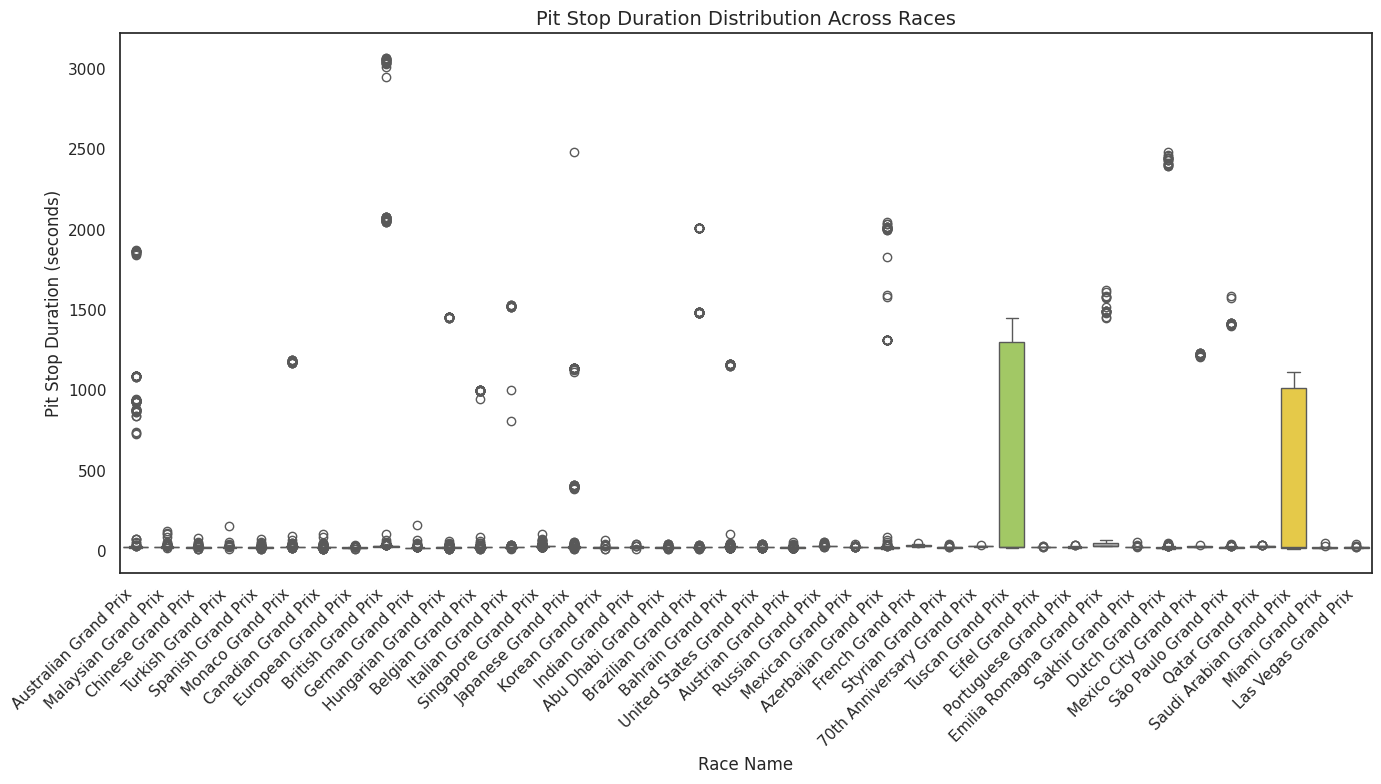

In [ ]:
pit_stop_duration_by_race(df_pitstop)


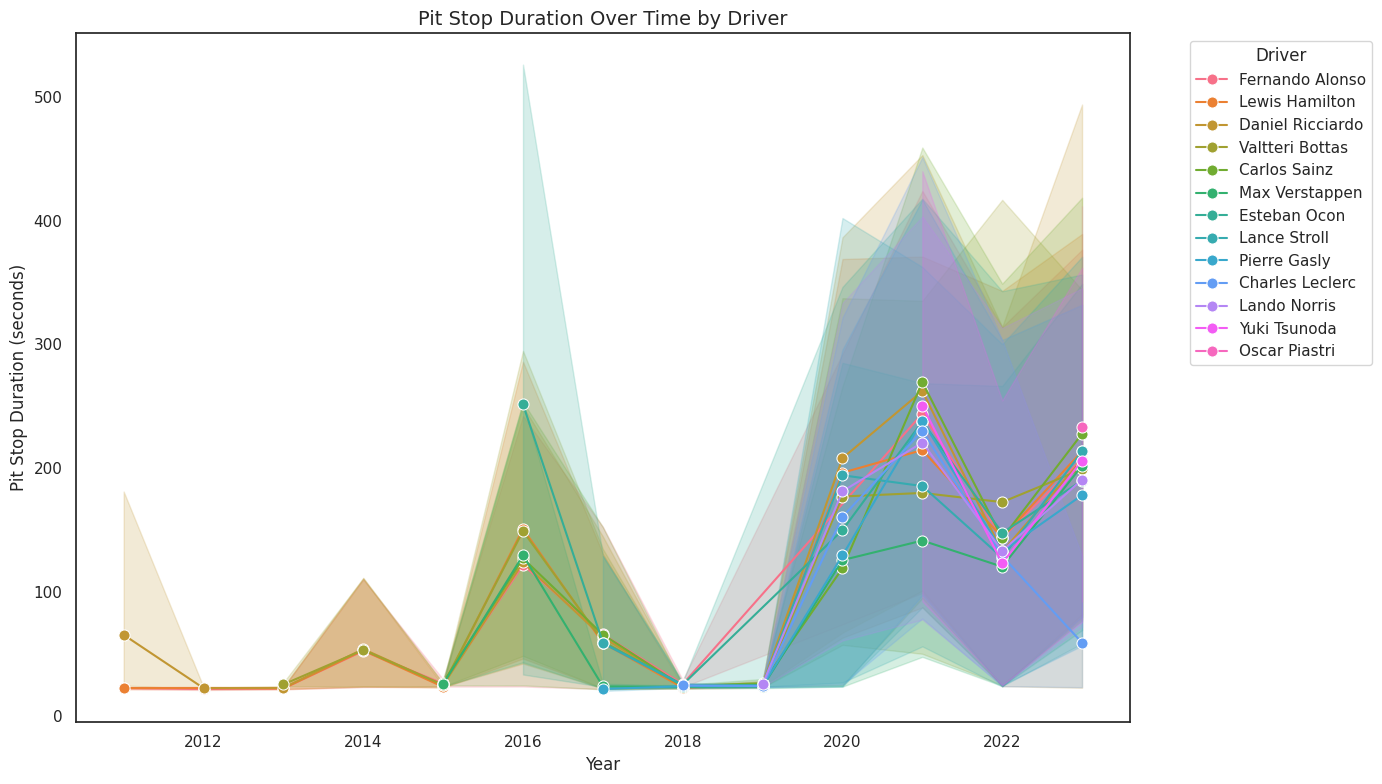

In [ ]:
pit_stop_duration_over_time(df_active_pitstop)


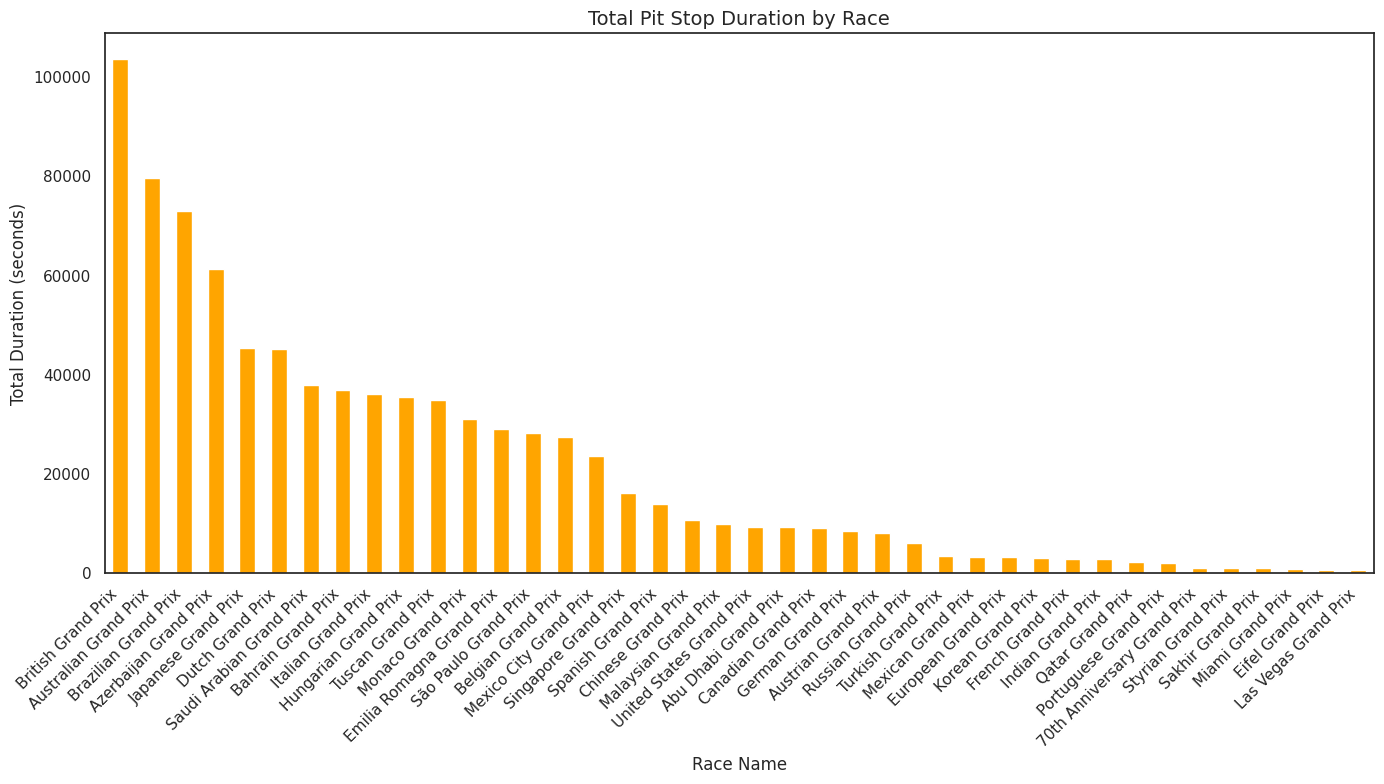

In [ ]:
total_pit_stop_duration_by_race(df_pitstop)

# Weather

In [ ]:
df_weather.head(100)

Year  Round           Grand Prix                         Circuit  \
0   2020      1          Austrian GP                   Red Bull Ring   
1   2020      2           Styrian GP                   Red Bull Ring   
2   2020      3         Hungarian GP                     Hungaroring   
3   2020      4           British GP             Silverstone Circuit   
4   2020      5  70th Anniversary GP             Silverstone Circuit   
..   ...    ...                  ...                             ...   
78  2023     18     United States GP         Circuit of the Americas   
79  2023     19       Mexico City GP    Autódromo Hermanos Rodríguez   
80  2023     20         São Paulo GP      Autódromo José Carlos Pace   
81  2023     21         Las Vegas GP  Las Vegas Strip Street Circuit   
82  2023     22         Abu Dhabi GP              Yas Marina Circuit   

          Date  Latitude  Longitude  Weather  
0   2020-07-05   47.2197   14.76470      dry  
1   2020-07-12   47.2197   14.76470      dry  
2   2020-07-19   47.5789   19.24860      wet  
3   2020-08-02   52.0786   -1.01694      wet  
4   2020-08-09   52.0786   -1.01694      dry  
..         ...       ...        ...      ...  
78  2023-10-22   30.1328  -97.64110      wet  
79  2023-10-29   19.4042  -99.09070      wet  
80  2023-11-05  -23.7036  -46.69970      wet  
81  2023-11-19   36.1147 -115.17300      dry  
82  2023-11-26   24.4672   54.60310  unknown  

[83 rows x 8 columns]

In [ ]:
def visualize_weather(df_weather):
    weather_counts = df_weather.groupby(['Year', 'Weather']).size().unstack().fillna(0)
    plt.figure(figsize=(12, 6))
    weather_counts.plot(kind='bar', stacked=True, colormap='Set2', width=0.8)
    plt.title('Weather Conditions by Year', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Races', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.show()

def weather_distribution(df_weather):
    weather_counts = df_weather['Weather'].value_counts()
    plt.figure(figsize=(8, 8))
    weather_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=90)
    plt.title('Weather Distribution Across All Races', fontsize=16, fontweight='bold')
    plt.ylabel('')
    plt.show()

def weather_by_circuit(df_weather):
    weather_counts = df_weather.groupby(['Circuit', 'Weather']).size().unstack().fillna(0)
    plt.figure(figsize=(20, 12))
    weather_counts.plot(kind='barh', stacked=True, colormap='Set3', width=0.8)
    plt.title('Weather Conditions by Circuit', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Races', fontsize=14)
    plt.ylabel('Circuit', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

def weather_over_time(df_weather):
    df_weather['Date'] = pd.to_datetime(df_weather['Date'])
    df_weather['Weather_Type'] = df_weather['Weather'].apply(lambda x: 'Wet' if x == 'wet' else 'Dry')
    weather_time = df_weather.groupby([df_weather['Date'].dt.year, 'Weather_Type']).size().unstack().fillna(0)
    plt.figure(figsize=(12, 6))
    weather_time.plot(kind='line', marker='o', figsize=(12, 6), color=['#ff9999', '#66b3ff'])
    plt.title('Weather Conditions Over Time (Years)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Races', fontsize=14)
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

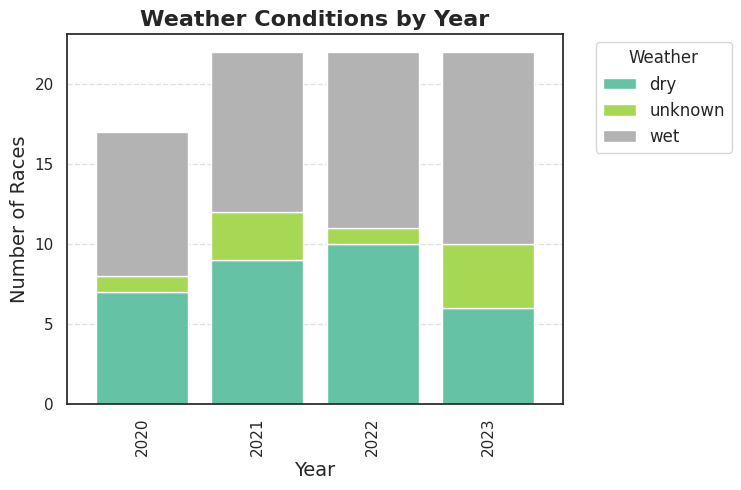

In [ ]:
visualize_weather(df_weather)


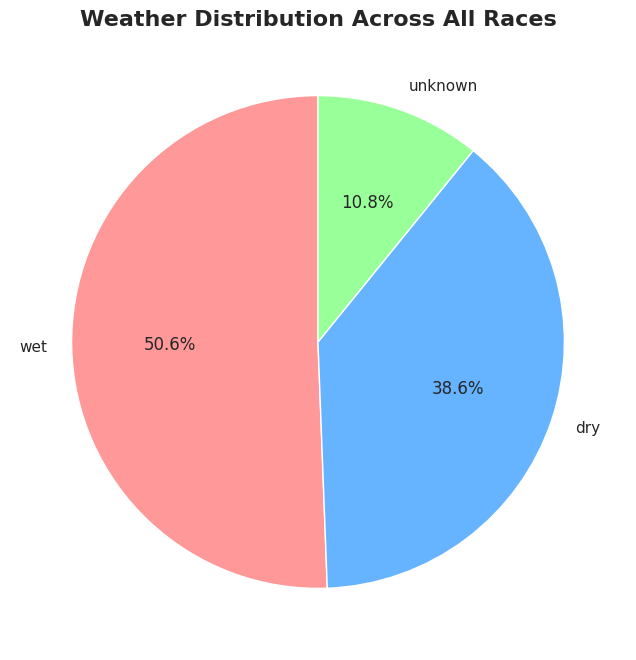

In [ ]:
weather_distribution(df_weather)


<Figure size 2000x1200 with 0 Axes>

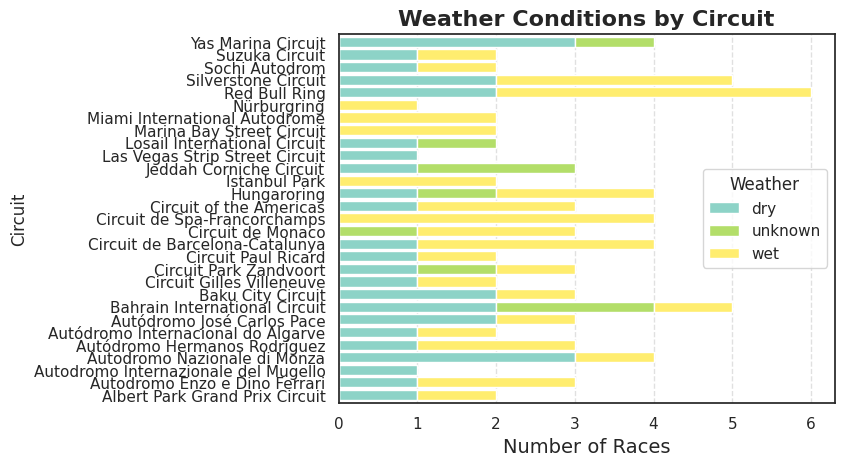

In [ ]:
weather_by_circuit(df_weather)

<Figure size 1200x600 with 0 Axes>

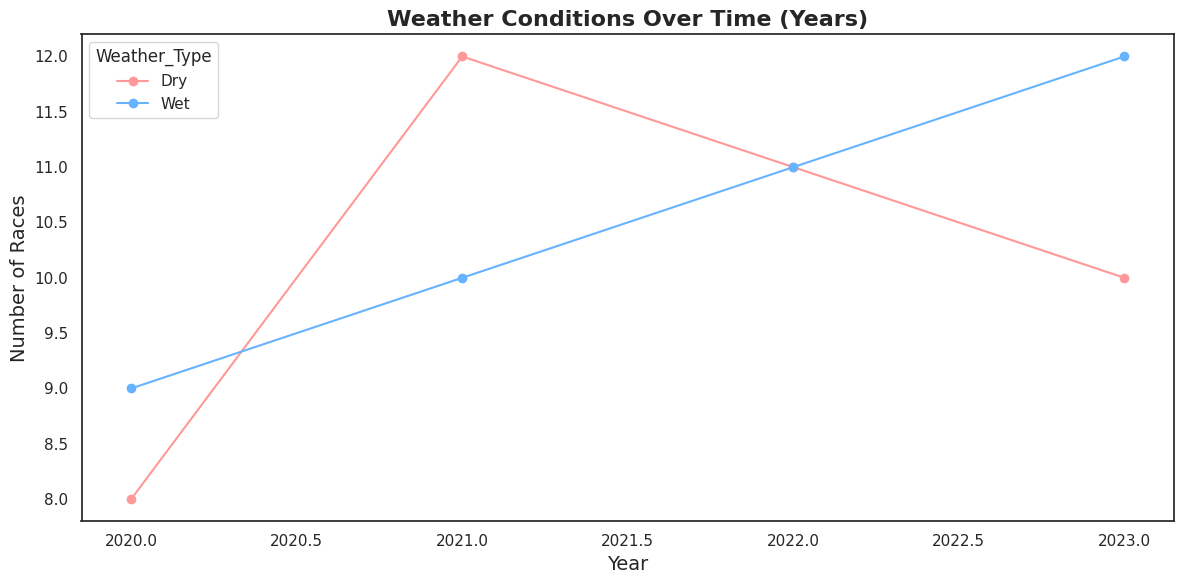

In [ ]:
weather_over_time(df_weather)

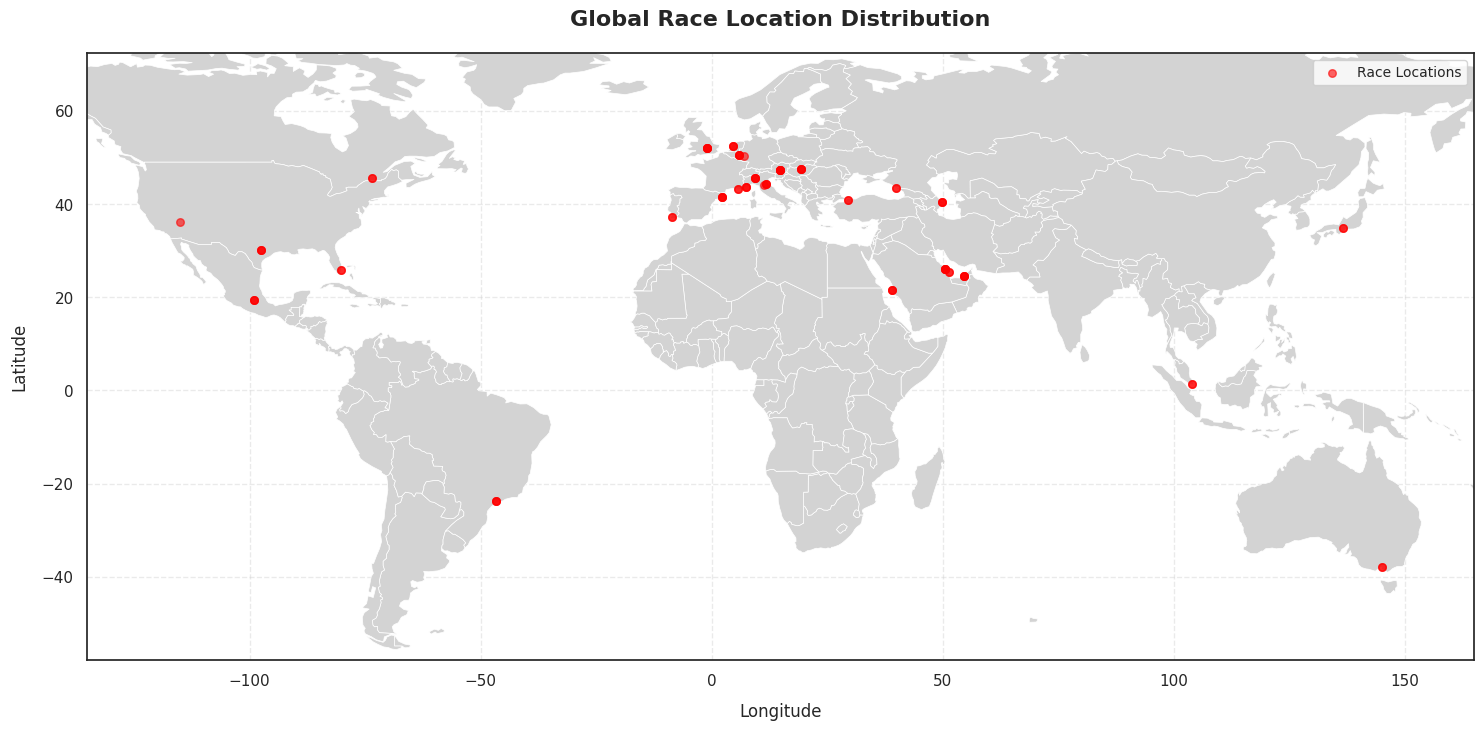

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import requests
import zipfile
import os
import io

def plot_race_locations(df_weather, save_path=None):
    try:
        geometry = [Point(lon, lat) for lon, lat in zip(df_weather['Longitude'], df_weather['Latitude'])]
        geo_df = gpd.GeoDataFrame(df_weather, geometry=geometry, crs="EPSG:4326")
        url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
        try:
            world = gpd.read_file(url)
        except Exception:
            backup_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
            world = gpd.read_file(backup_url)

        fig, ax = plt.subplots(figsize=(15, 10))
        world.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.5)
        geo_df.plot(ax=ax, marker='o', color='red', markersize=30, alpha=0.6, label='Race Locations')

        margin = 20
        bounds = geo_df.total_bounds
        ax.set_xlim([bounds[0] - margin, bounds[2] + margin])
        ax.set_ylim([bounds[1] - margin, bounds[3] + margin])

        plt.title('Global Race Location Distribution', pad=20, fontsize=16, fontweight='bold')
        plt.xlabel('Longitude', labelpad=10, fontsize=12)
        plt.ylabel('Latitude', labelpad=10, fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.4)
        plt.legend(fontsize=10)
        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.close()
        else:
            plt.show()

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        raise

plot_race_locations(df_weather)

# Feature Engineering


In [ ]:
df_constructor.head()

Year  Position Constructor  Points
0  2001         1     Ferrari   179.0
1  2001         2     McLaren   102.0
2  2001         3    Williams    80.0
3  2001         4      Sauber    21.0
4  2001         5      Jordan    19.0

In [ ]:
df_pitstop.drop('Round', axis = 1, inplace = True)
df_pitstop.drop('Race Name', axis = 1, inplace = True)
df_pitstop.drop('Lap', axis = 1, inplace = True)

In [ ]:
df_pitstop.head(20)

Year                         Circuit    Country         Driver Name  \
0   2011  Albert Park Grand Prix Circuit  Australia   Jaime Alguersuari   
1   2011  Albert Park Grand Prix Circuit  Australia  Michael Schumacher   
2   2011  Albert Park Grand Prix Circuit  Australia         Mark Webber   
3   2011  Albert Park Grand Prix Circuit  Australia     Fernando Alonso   
4   2011  Albert Park Grand Prix Circuit  Australia        Felipe Massa   
5   2011  Albert Park Grand Prix Circuit  Australia  Rubens Barrichello   
6   2011  Albert Park Grand Prix Circuit  Australia    Sebastian Vettel   
7   2011  Albert Park Grand Prix Circuit  Australia       Paul di Resta   
8   2011  Albert Park Grand Prix Circuit  Australia   Jérôme d'Ambrosio   
9   2011  Albert Park Grand Prix Circuit  Australia     Sébastien Buemi   
10  2011  Albert Park Grand Prix Circuit  Australia       Nick Heidfeld   
11  2011  Albert Park Grand Prix Circuit  Australia      Lewis Hamilton   
12  2011  Albert Park Grand Prix Circuit  Australia       Vitaly Petrov   
13  2011  Albert Park Grand Prix Circuit  Australia        Nico Rosberg   
14  2011  Albert Park Grand Prix Circuit  Australia     Kamui Kobayashi   
15  2011  Albert Park Grand Prix Circuit  Australia        Adrian Sutil   
16  2011  Albert Park Grand Prix Circuit  Australia        Jarno Trulli   
17  2011  Albert Park Grand Prix Circuit  Australia       Jenson Button   
18  2011  Albert Park Grand Prix Circuit  Australia   Jaime Alguersuari   
19  2011  Albert Park Grand Prix Circuit  Australia   Heikki Kovalainen   

    Stop Number  Duration (s)  
0             1        26.898  
1             1        25.021  
2             1        23.426  
3             1        23.251  
4             1        23.842  
5             1        23.643  
6             1        22.603  
7             1        24.863  
8             1        25.259  
9             1        25.342  
10            1        22.994  
11            1        23.227  
12            1        24.535  
13            1        23.716  
14            1        24.064  
15            1        25.978  
16            1        24.899  
17            1        16.867  
18            2        24.463  
19            1        24.865

In [ ]:
df_race_result.drop('Laps',axis = 1, inplace = True)
df_race_result.drop('Time/Retired',axis = 1, inplace = True)
df_race_result.drop('Fastest Lap Time',axis = 1, inplace = True)
df_race_result.drop('+1pts',axis = 1, inplace = True)

In [ ]:
df_race_result.head(20)

Year                           Track    Country  Position  \
0   2001  Albert Park Grand Prix Circuit  Australia         1   
1   2001  Albert Park Grand Prix Circuit  Australia         2   
2   2001  Albert Park Grand Prix Circuit  Australia         3   
3   2001  Albert Park Grand Prix Circuit  Australia         4   
4   2001  Albert Park Grand Prix Circuit  Australia         5   
5   2001  Albert Park Grand Prix Circuit  Australia         6   
6   2001  Albert Park Grand Prix Circuit  Australia         7   
7   2001  Albert Park Grand Prix Circuit  Australia         8   
8   2001  Albert Park Grand Prix Circuit  Australia         9   
9   2001  Albert Park Grand Prix Circuit  Australia        10   
10  2001  Albert Park Grand Prix Circuit  Australia        11   
11  2001  Albert Park Grand Prix Circuit  Australia        12   
12  2001  Albert Park Grand Prix Circuit  Australia        13   
13  2001  Albert Park Grand Prix Circuit  Australia        14   
14  2001  Albert Park Grand Prix Circuit  Australia        15   
15  2001  Albert Park Grand Prix Circuit  Australia        16   
16  2001  Albert Park Grand Prix Circuit  Australia        17   
17  2001  Albert Park Grand Prix Circuit  Australia        18   
18  2001  Albert Park Grand Prix Circuit  Australia        19   
19  2001  Albert Park Grand Prix Circuit  Australia        20   

                   Driver      Team  Starting Grid  Points  
0      Michael Schumacher   Ferrari              1    10.0  
1         David Coulthard   McLaren              6     6.0  
2      Rubens Barrichello   Ferrari              2     4.0  
3           Nick Heidfeld    Sauber             10     3.0  
4   Heinz-Harald Frentzen    Jordan              4     2.0  
5          Kimi Räikkönen    Sauber             13     1.0  
6           Olivier Panis       BAR              9     0.0  
7           Luciano Burti    Jaguar             21     0.0  
8              Jean Alesi     Prost             14     0.0  
9          Jos Verstappen    Arrows             15     0.0  
10           Eddie Irvine    Jaguar             12     0.0  
11        Fernando Alonso   Minardi             19     0.0  
12   Giancarlo Fisichella  Benetton             17     0.0  
13          Jenson Button  Benetton             16     0.0  
14     Juan Pablo Montoya  Williams             11     0.0  
15           Jarno Trulli    Jordan              7     0.0  
16          Mika Häkkinen   McLaren              3     0.0  
17        Ralf Schumacher  Williams              5     0.0  
18     Jacques Villeneuve       BAR              8     0.0  
19          Tarso Marques   Minardi             22     0.0

In [ ]:
df_quali.drop('Q1-Q2 Improvement',axis = 1, inplace = True)
df_quali.drop('Q2-Q3 Improvement',axis = 1, inplace = True)
df_quali.drop('Q1',axis = 1, inplace = True)
df_quali.drop('Q2',axis = 1, inplace = True)

In [ ]:
df_quali.head(20)

Year                           Track    Country  Position  \
1120  2006   Bahrain International Circuit    Bahrain         1   
1121  2006   Bahrain International Circuit    Bahrain         2   
1122  2006   Bahrain International Circuit    Bahrain         3   
1123  2006   Bahrain International Circuit    Bahrain         4   
1124  2006   Bahrain International Circuit    Bahrain         5   
1125  2006   Bahrain International Circuit    Bahrain         6   
1126  2006   Bahrain International Circuit    Bahrain         7   
1127  2006   Bahrain International Circuit    Bahrain         8   
1128  2006   Bahrain International Circuit    Bahrain         9   
1129  2006   Bahrain International Circuit    Bahrain        10   
1142  2006    Sepang International Circuit   Malaysia         1   
1143  2006    Sepang International Circuit   Malaysia         2   
1144  2006    Sepang International Circuit   Malaysia         3   
1145  2006    Sepang International Circuit   Malaysia         4   
1146  2006    Sepang International Circuit   Malaysia         5   
1147  2006    Sepang International Circuit   Malaysia         6   
1148  2006    Sepang International Circuit   Malaysia         7   
1149  2006    Sepang International Circuit   Malaysia         8   
1150  2006    Sepang International Circuit   Malaysia         9   
1164  2006  Albert Park Grand Prix Circuit  Australia         1   

                    Driver            Team      Q3  
1120    Michael Schumacher         Ferrari  91.431  
1121          Felipe Massa         Ferrari  91.478  
1122         Jenson Button           Honda  91.549  
1123       Fernando Alonso  Alpine F1 Team  91.702  
1124    Juan Pablo Montoya         McLaren  92.164  
1125    Rubens Barrichello           Honda  92.579  
1126           Mark Webber        Williams  93.006  
1127       Christian Klien        Red Bull  93.112  
1128  Giancarlo Fisichella  Alpine F1 Team  93.496  
1129         Nick Heidfeld          Sauber  93.926  
1142  Giancarlo Fisichella  Alpine F1 Team  93.840  
1143         Jenson Button           Honda  93.986  
1144          Nico Rosberg        Williams  94.626  
1145    Michael Schumacher         Ferrari  94.668  
1146           Mark Webber        Williams  94.672  
1147    Juan Pablo Montoya         McLaren  94.916  
1148        Kimi Räikkönen         McLaren  94.983  
1149       Fernando Alonso  Alpine F1 Team  95.747  
1150       Christian Klien        Red Bull  98.715  
1164         Jenson Button           Honda  85.229

In [ ]:
df_weather.drop('Latitude',axis = 1, inplace = True)
df_weather.drop('Longitude', axis =1 , inplace = True)
df_weather.drop('Grand Prix', axis =1 , inplace = True)
df_weather.drop('Date', axis =1 , inplace = True)
df_weather.drop('Round',axis = 1, inplace = True)

In [ ]:
df_weather.head(20)

Year                               Circuit Weather_Type
0   2020                         Red Bull Ring          Dry
1   2020                         Red Bull Ring          Dry
2   2020                           Hungaroring          Wet
3   2020                   Silverstone Circuit          Wet
4   2020                   Silverstone Circuit          Dry
5   2020        Circuit de Barcelona-Catalunya          Wet
6   2020          Circuit de Spa-Francorchamps          Wet
7   2020          Autodromo Nazionale di Monza          Wet
8   2020  Autodromo Internazionale del Mugello          Dry
9   2020                        Sochi Autodrom          Dry
10  2020                           Nürburgring          Wet
11  2020    Autódromo Internacional do Algarve          Wet
12  2020         Autodromo Enzo e Dino Ferrari          Dry
13  2020                         Istanbul Park          Wet
14  2020         Bahrain International Circuit          Wet
15  2020         Bahrain International Circuit          Dry
16  2020                    Yas Marina Circuit          Dry
17  2021         Bahrain International Circuit          Dry
18  2021         Autodromo Enzo e Dino Ferrari          Wet
19  2021    Autódromo Internacional do Algarve          Dry

In [ ]:
from google.colab import files

# Save DataFrames to CSV files
df_constructor.to_csv('df_constructor.csv', index=False)
df_pitstop.to_csv('df_pitstop.csv', index=False)
df_race_result.to_csv('df_race_result.csv', index=False)
df_quali.to_csv('df_quali.csv', index=False)
df_weather.to_csv('df_weather.csv', index=False)

# Download each CSV file
files.download('df_constructor.csv')
files.download('df_pitstop.csv')
files.download('df_race_result.csv')
files.download('df_quali.csv')
files.download('df_weather.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>